In [2]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scipy
!pip install opencv-python-headless

  Using cached numpy-1.23.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
  Using cached pandas-1.5.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
  Using cached pytz-2022.6-py2.py3-none-any.whl (498 kB)

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip
  Using cached matplotlib-3.6.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.8 MB)
  Using cached kiwisolver-1.4.4-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.6 MB)
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached contourpy-1.0.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (296 kB)
  Using cached Pillow-9.3.0-cp310-cp310-manylinux_2_28_x86_64.whl (3.3 MB)

[notice] A new release of pip available:

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import beta as beta_dist
import cv2
np.set_printoptions(suppress=True)

In [2]:
label_id = np.array(['A', 'B', 'C', 'D', 'E'])
neg_label_id = np.array(['A no', 'B no', 'C no', 'D no', 'E no'])
pos_label_id = np.array(['A yes', 'B yes', 'C yes', 'D yes', 'E yes'])
colors_list = ['green', 'red', 'blue', 'black', 'orange']

In [3]:
a = np.concatenate((np.ones(7, dtype=int), np.zeros(3, dtype=int))) #F(a) = 0.7
b = np.concatenate((np.ones(5, dtype=int), np.zeros(5, dtype=int))) #F(b) = 0.5
c = np.concatenate((np.ones(3, dtype=int), np.zeros(7, dtype=int))) #F(c) = 0.3
d = np.concatenate((np.ones(6, dtype=int), np.zeros(4, dtype=int))) #F(d) = 0.6
e = np.concatenate((np.ones(9, dtype=int), np.zeros(1, dtype=int))) #F(e) = 0.9
chances = np.vstack((a,b,c,d,e))
for i in range(5):
    np.random.shuffle(chances[i])
chances

array([[1, 0, 1, 1, 1, 1, 1, 0, 0, 1],
       [1, 0, 0, 0, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 0, 0, 0, 1],
       [1, 1, 0, 1, 1, 1, 1, 1, 1, 1]])

In [4]:
req_timestep = list(np.concatenate((np.arange(0,10), np.arange(19,100,10), np.arange(199,1000,100))))
x_axis = np.linspace(0,1,100)
alpha = np.ones(5, dtype='float')
beta = np.ones(5, dtype='float')
orderings = []
filenames= []

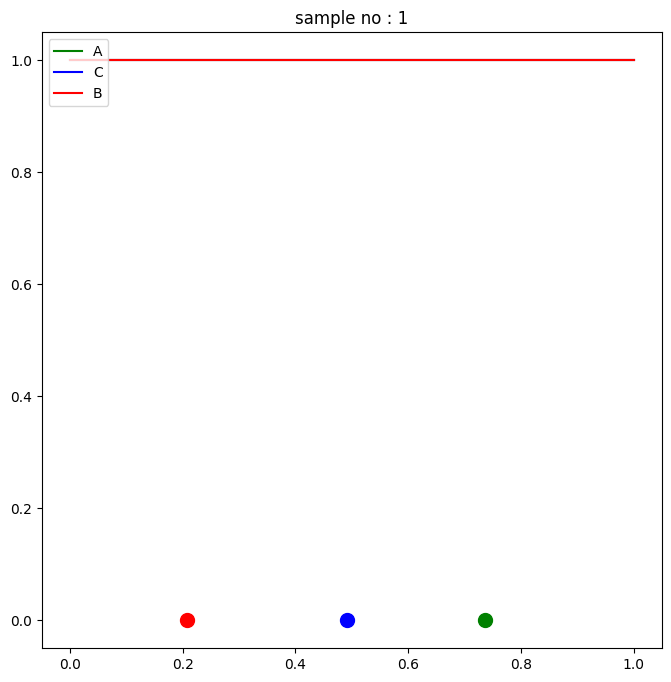

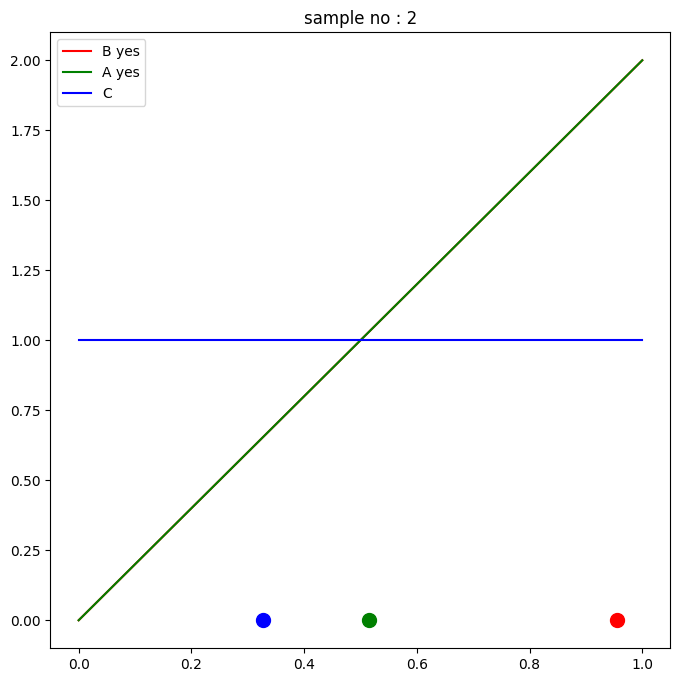

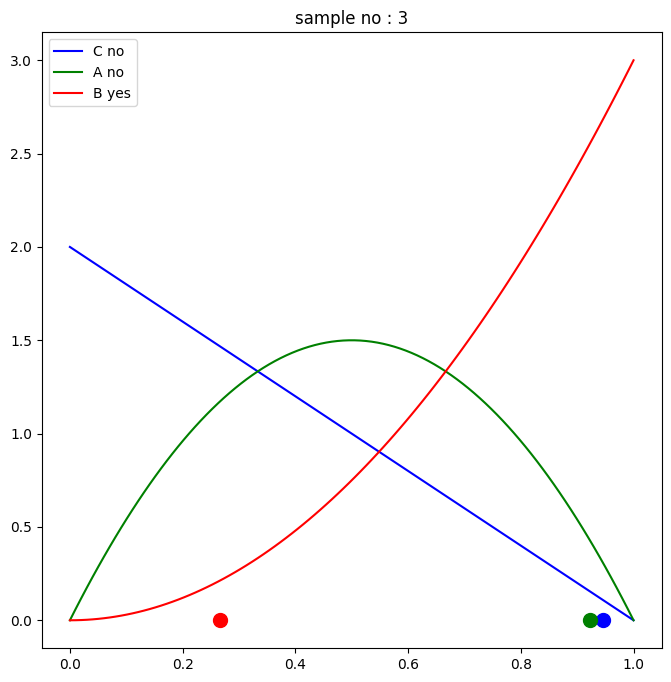

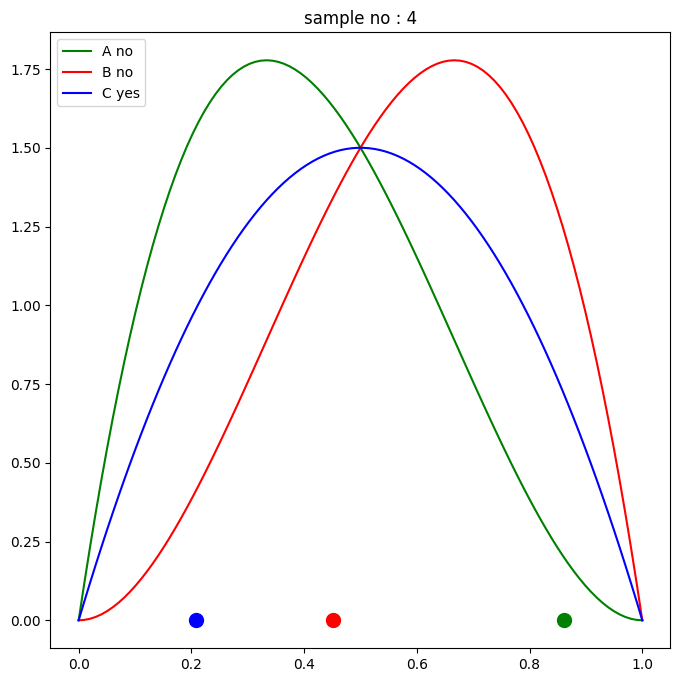

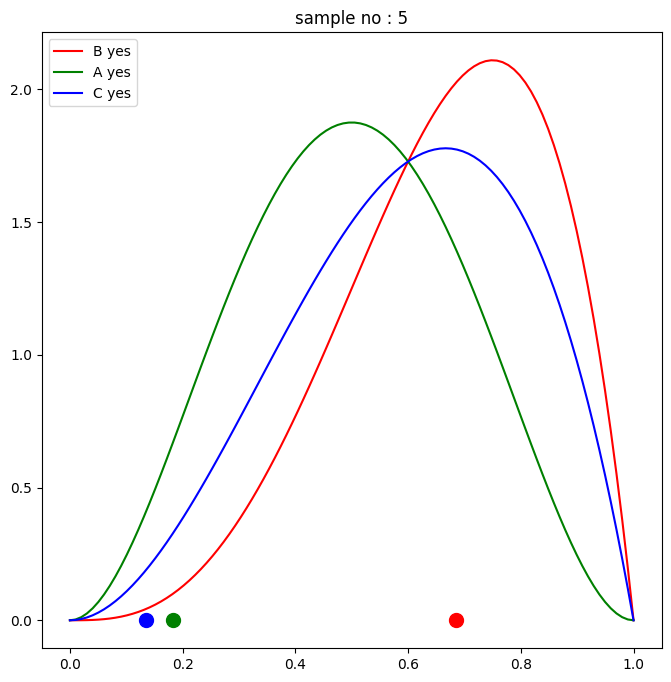

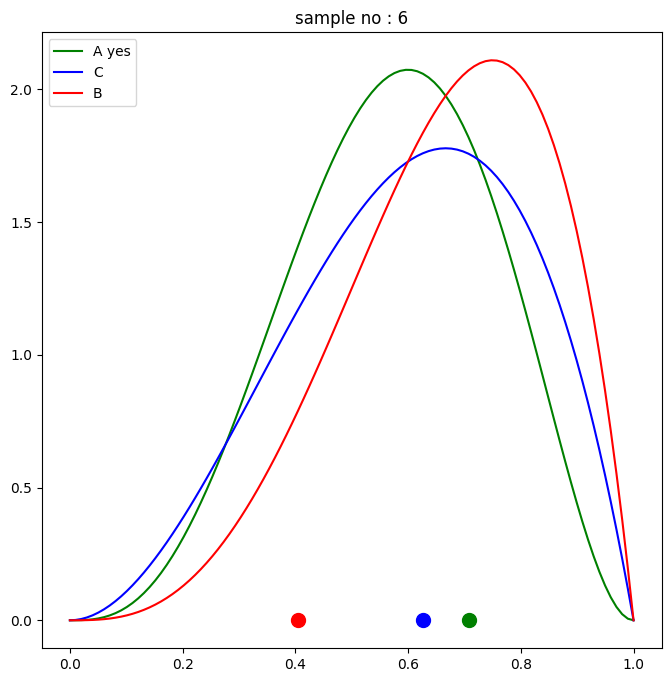

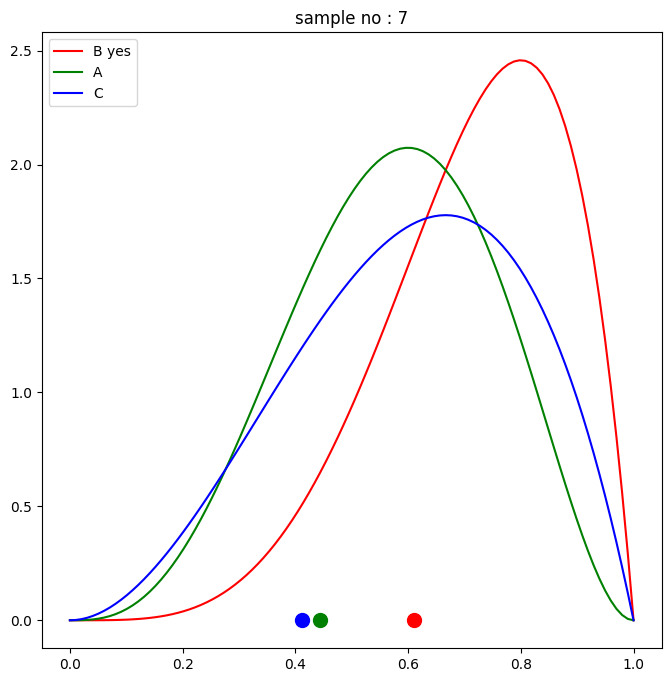

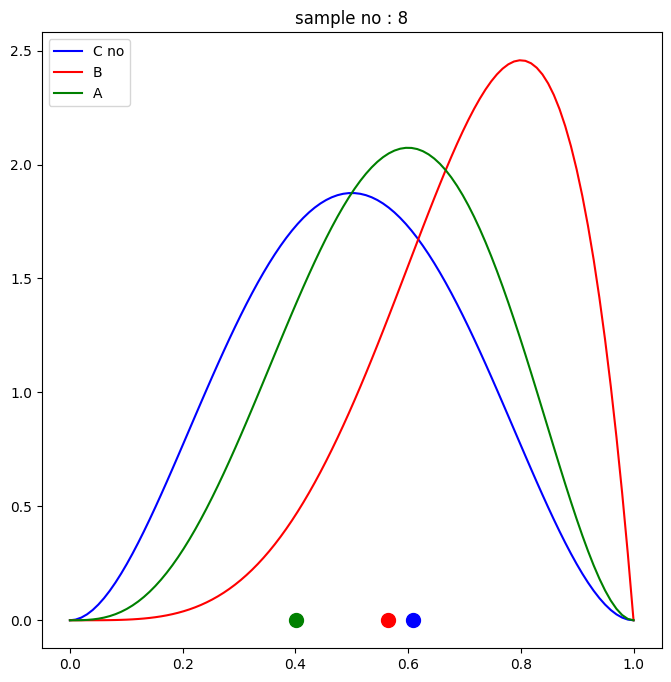

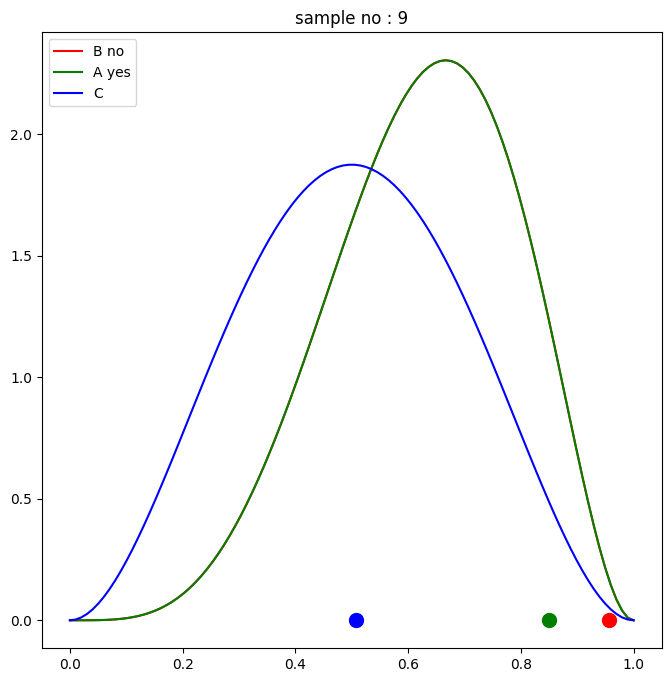

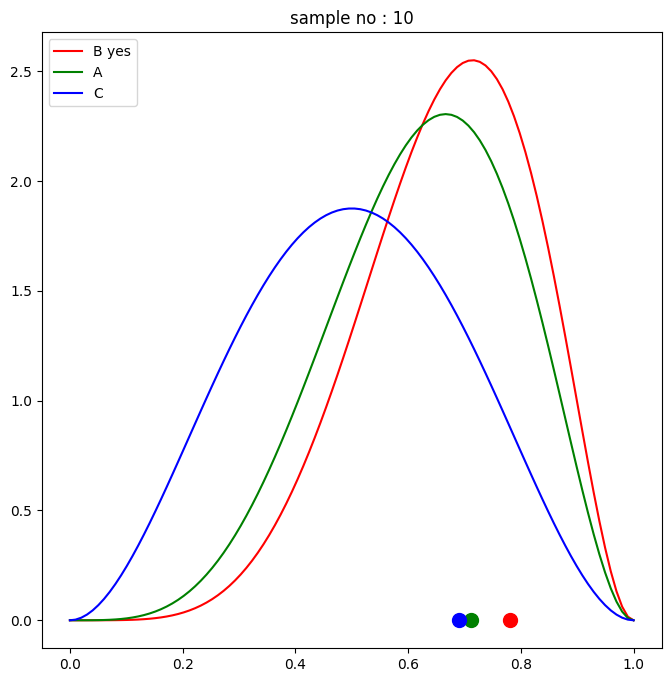

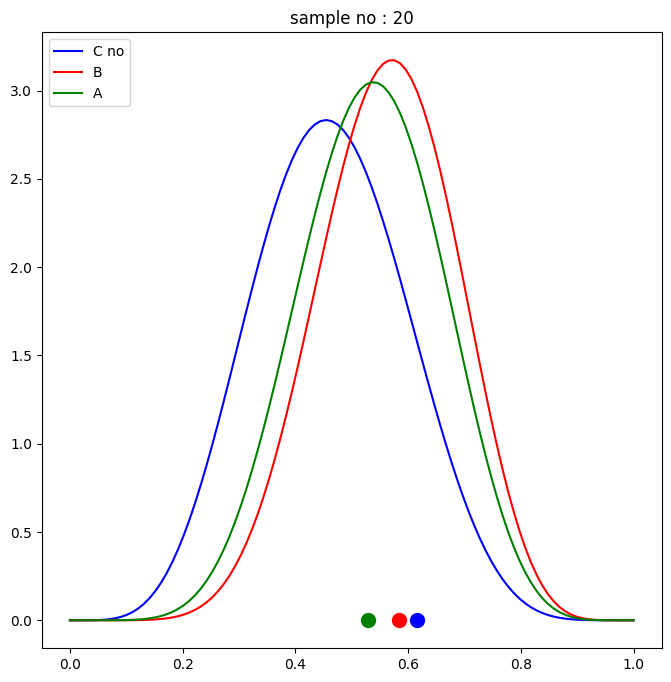

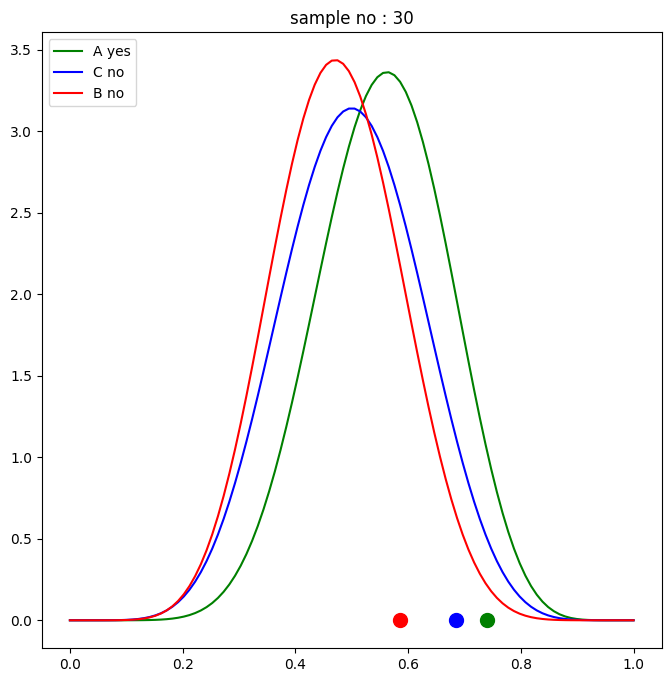

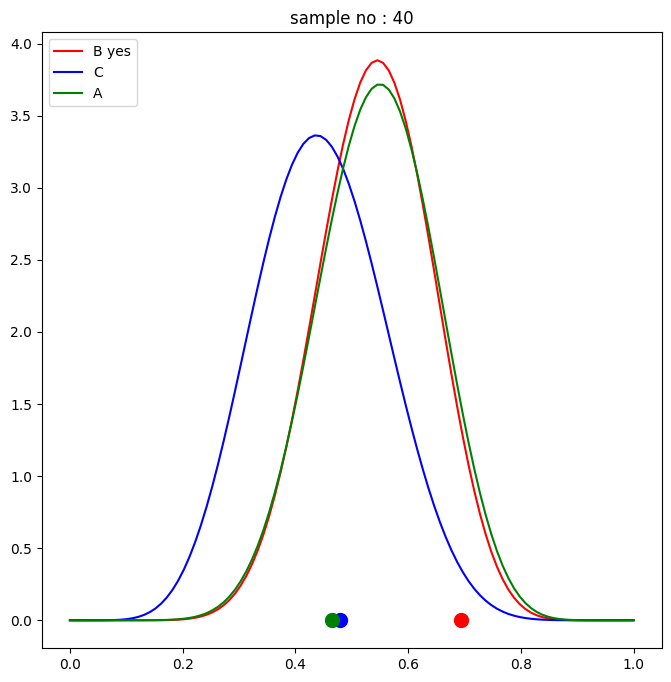

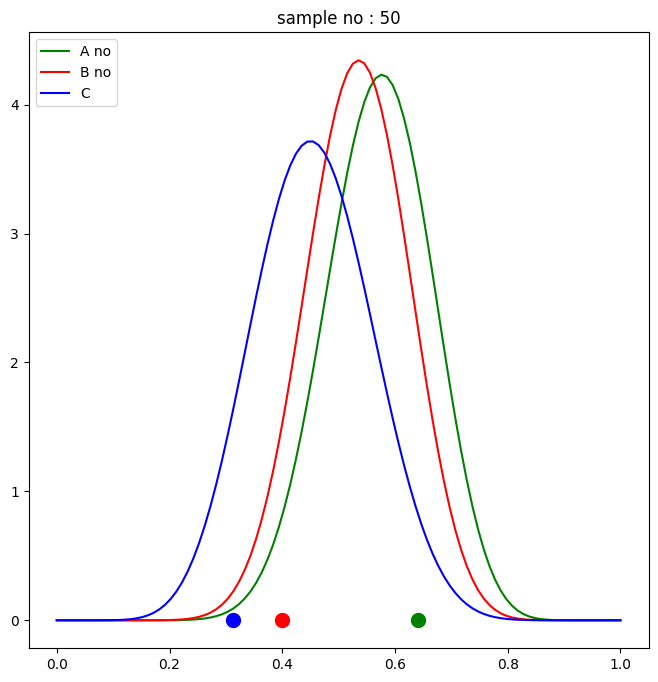

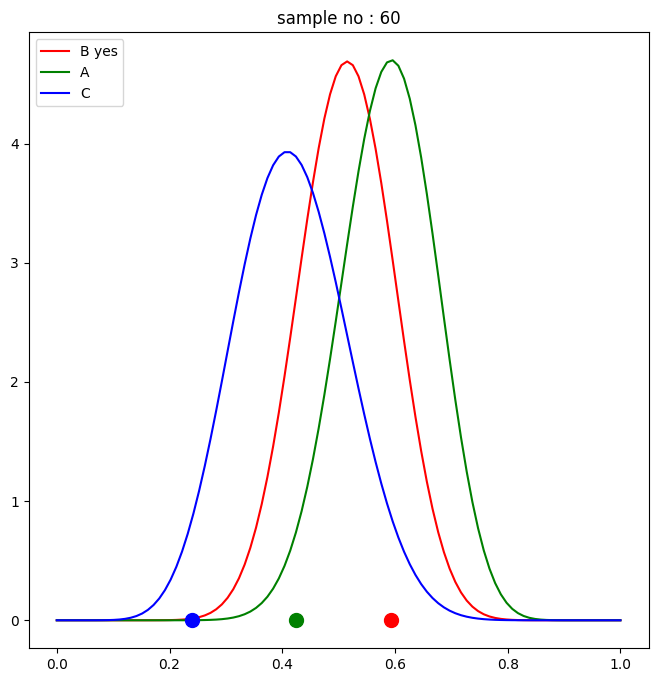

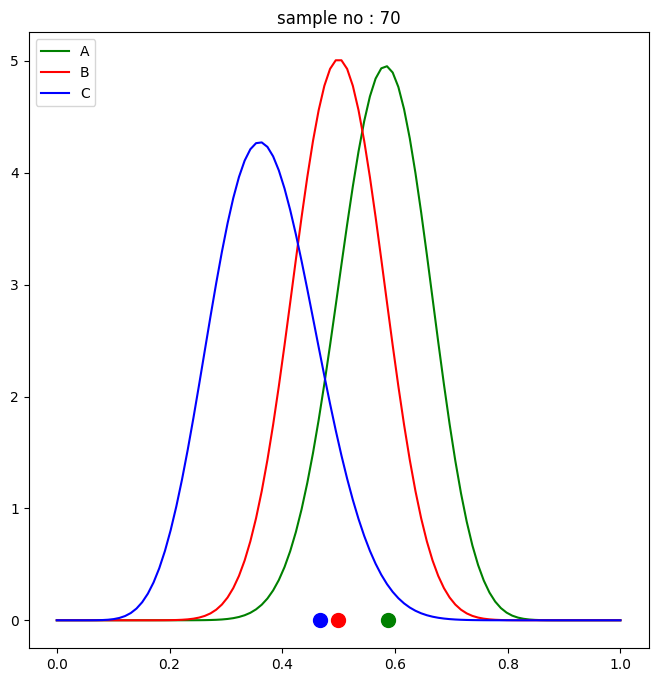

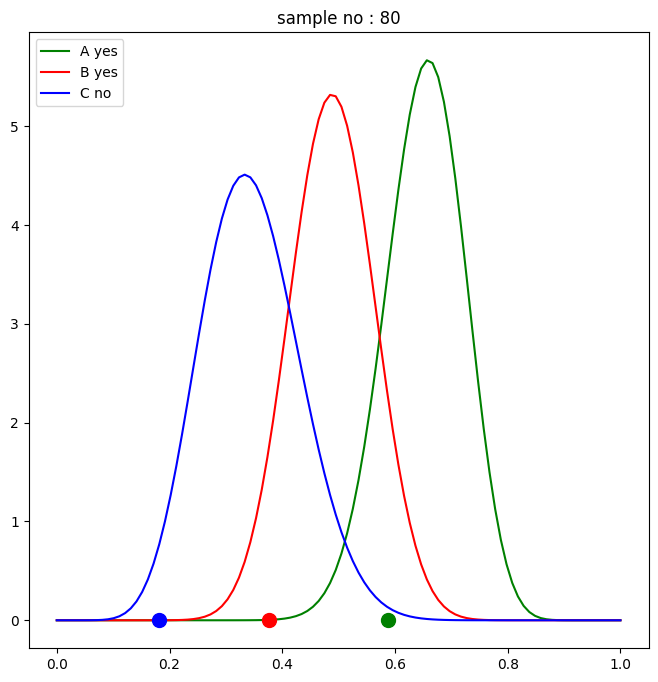

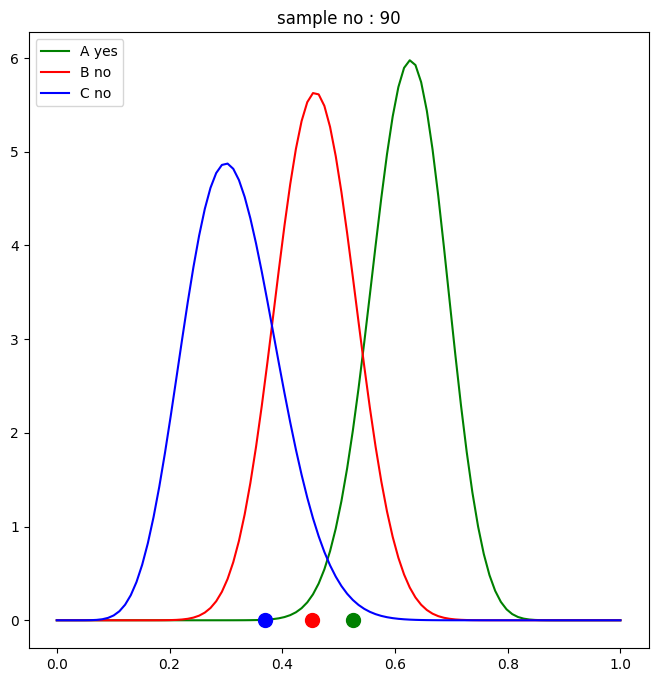

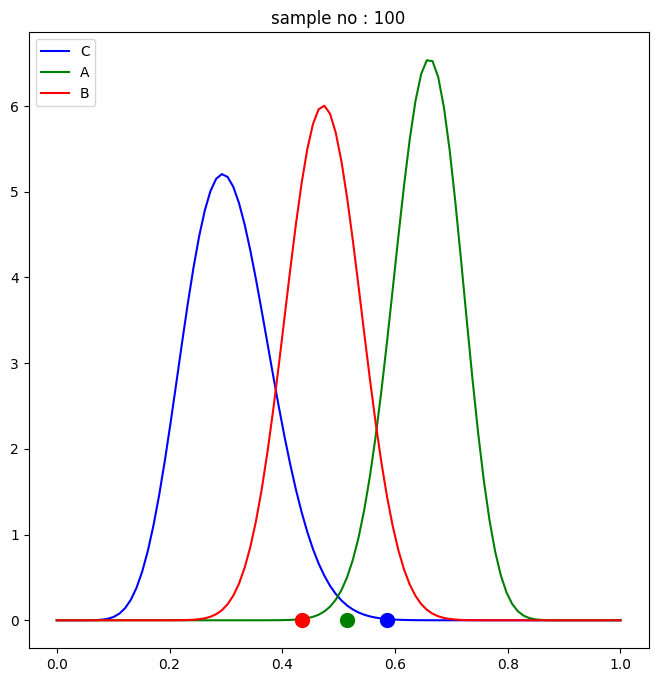

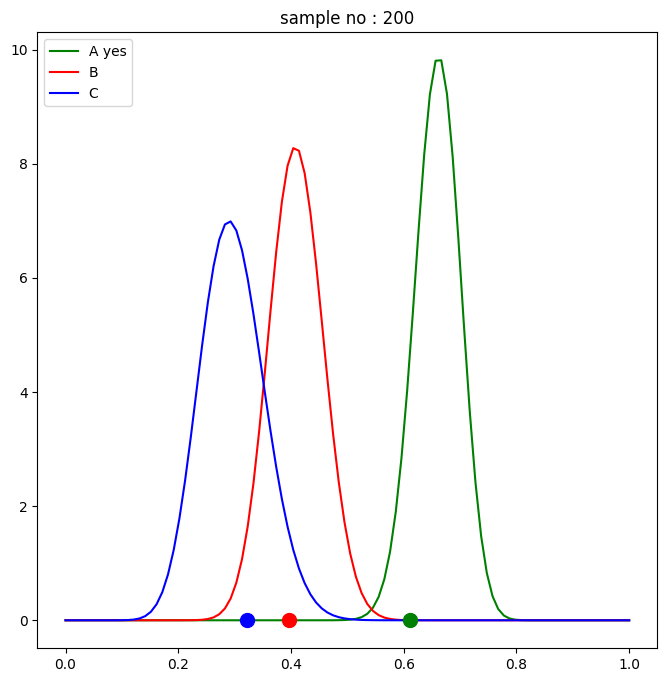

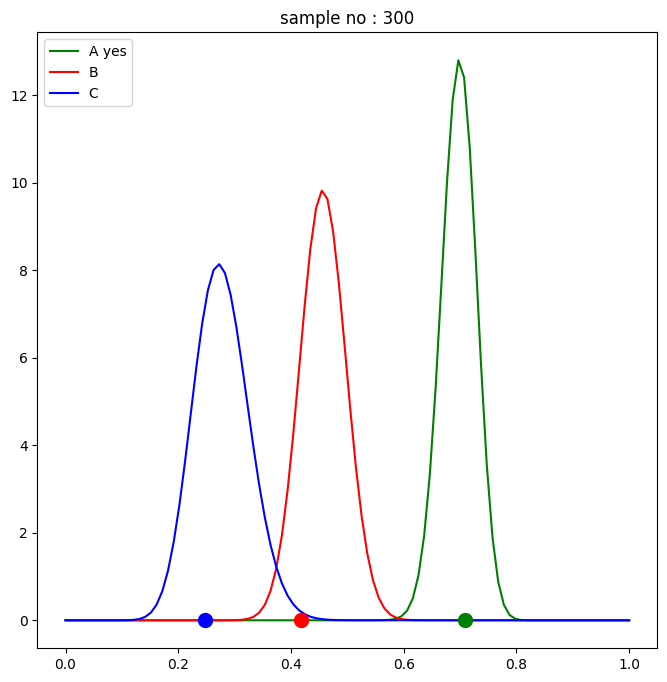

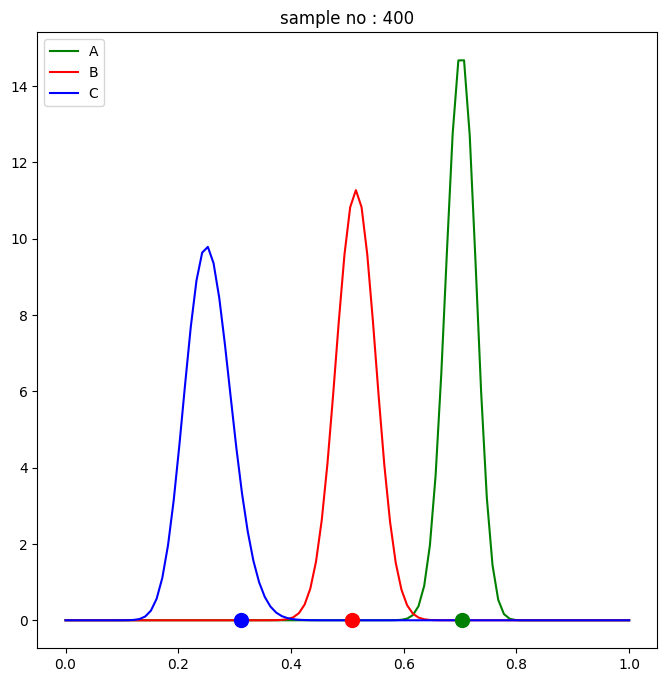

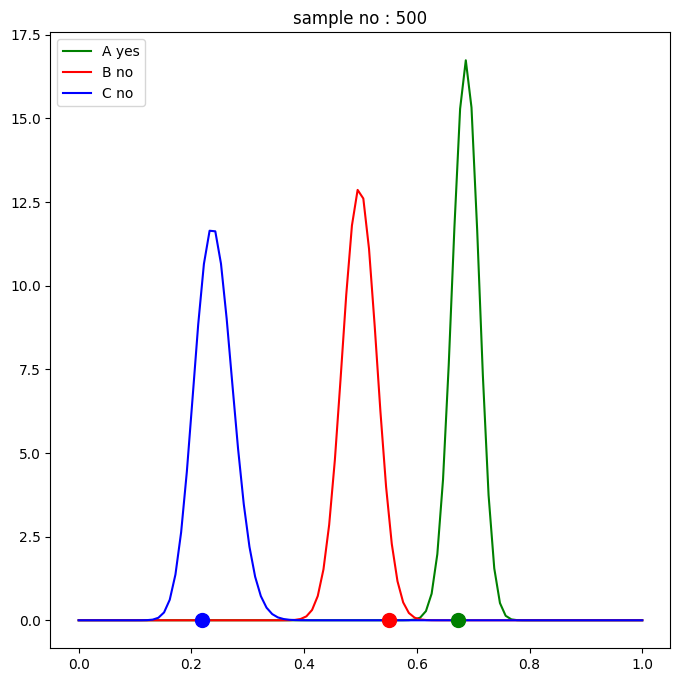

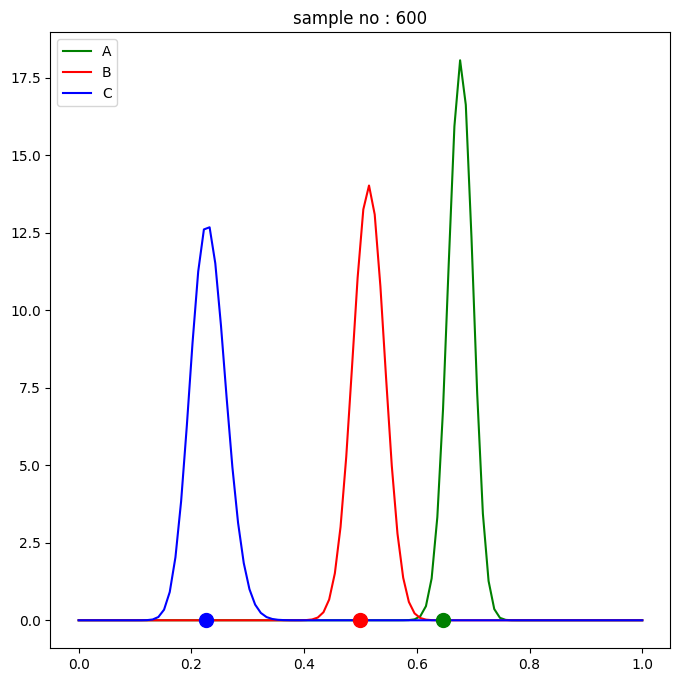

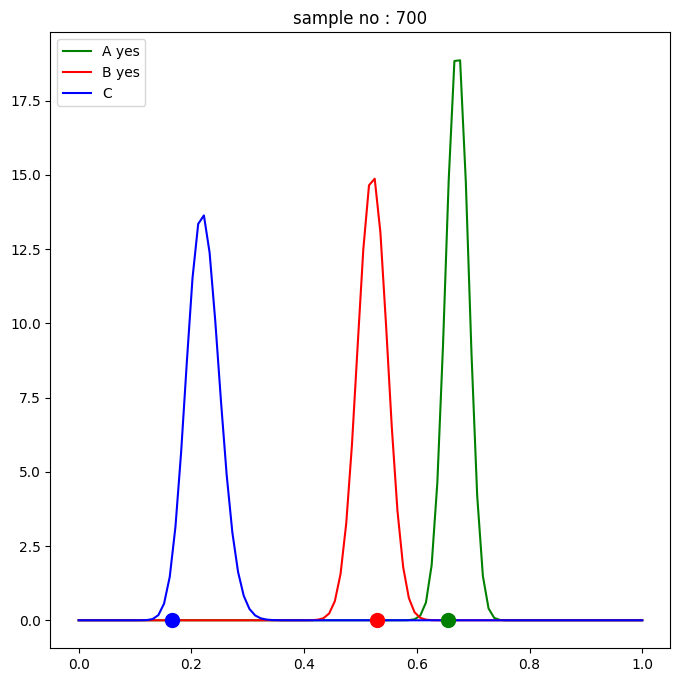

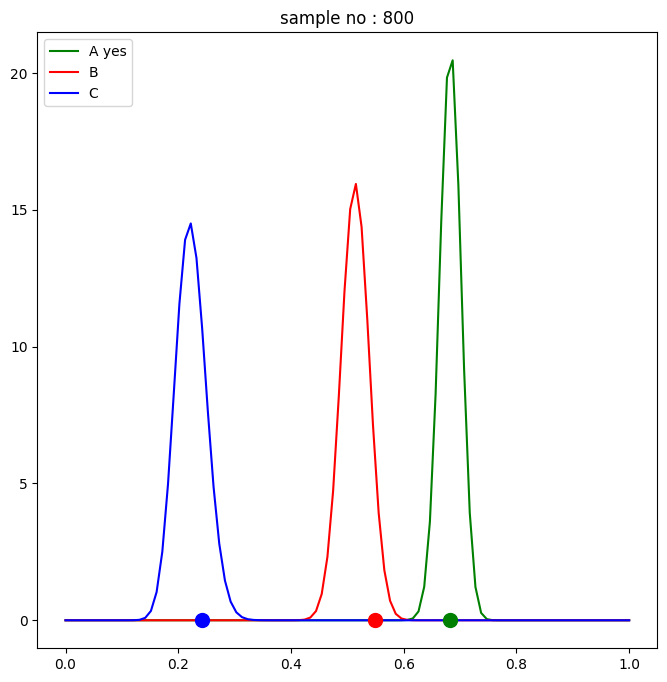

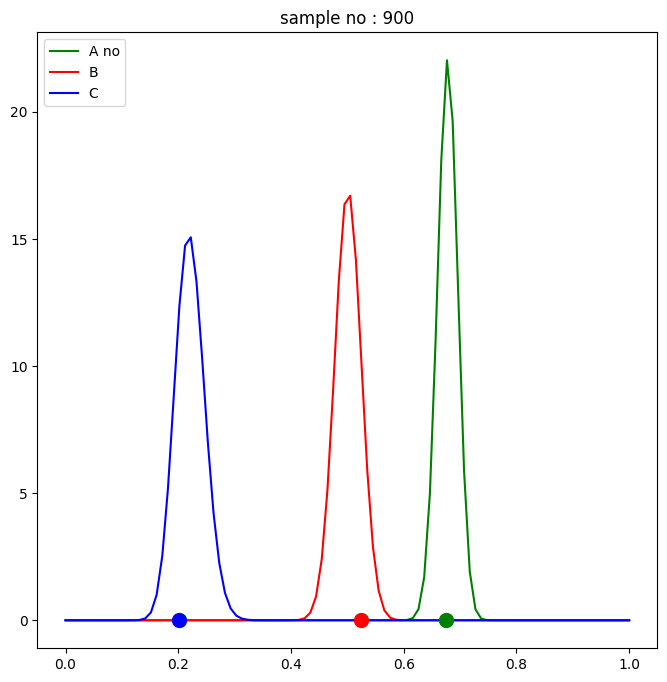

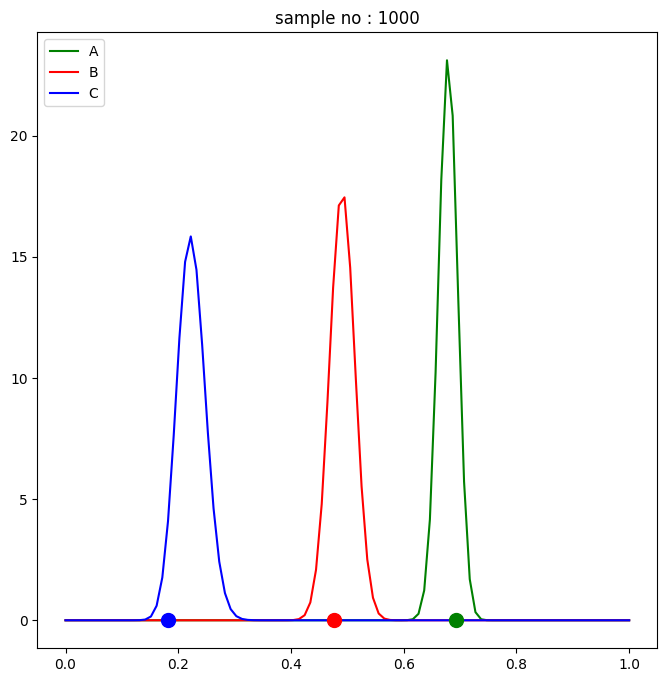

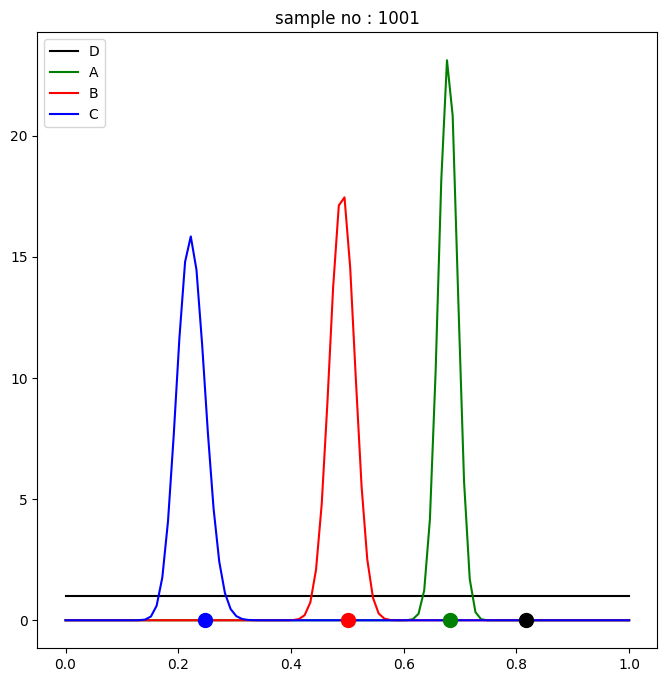

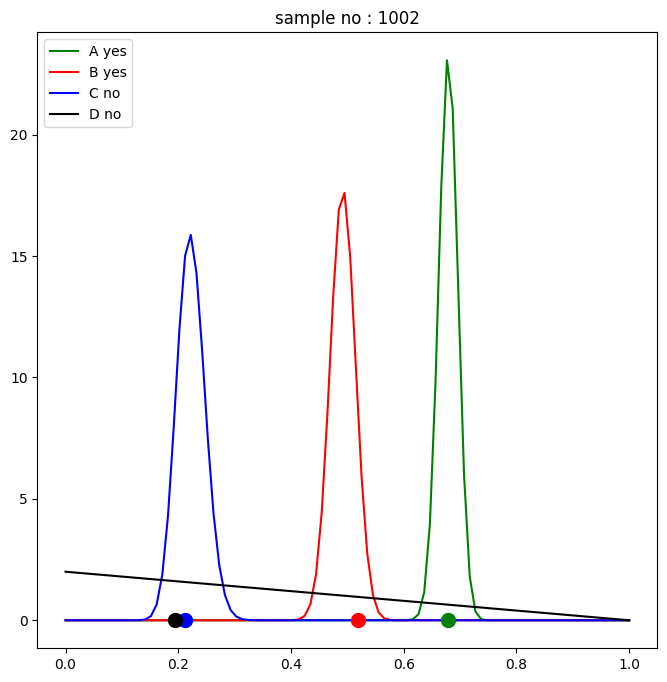

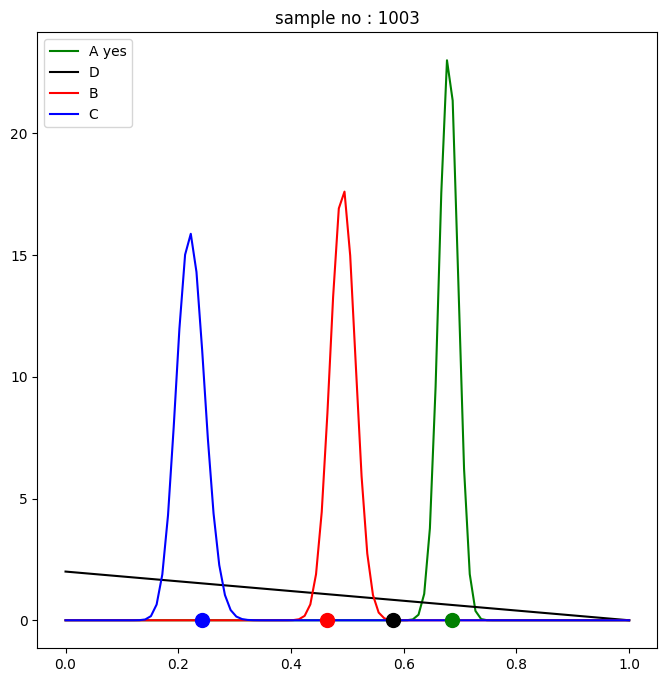

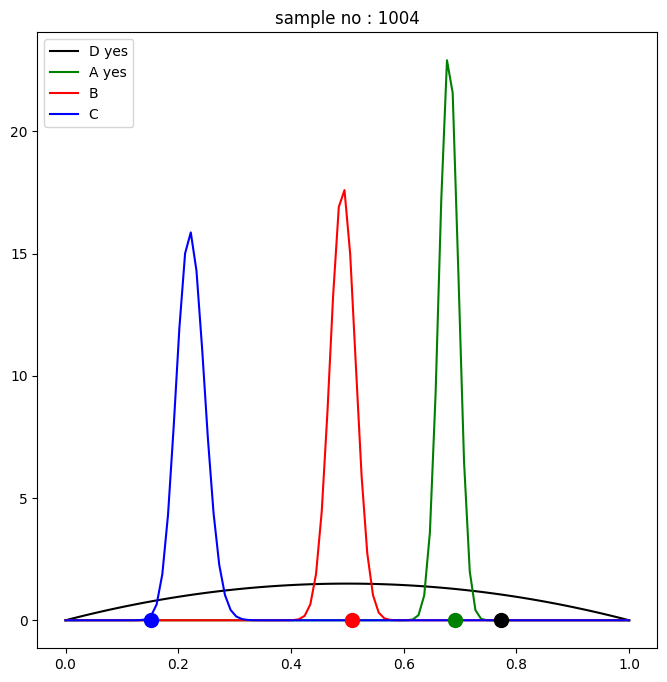

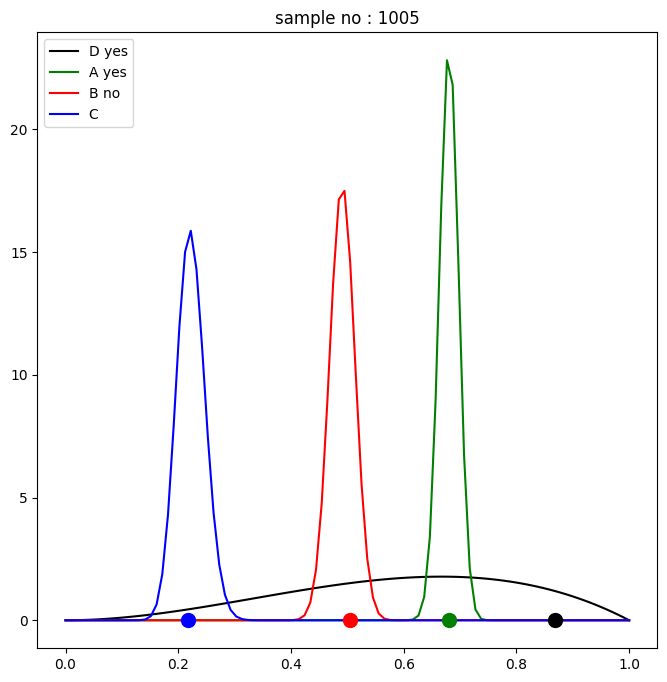

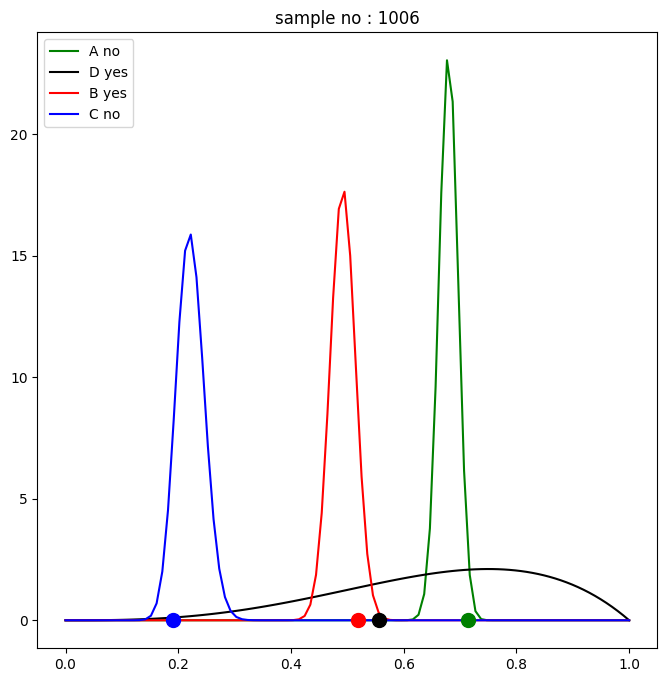

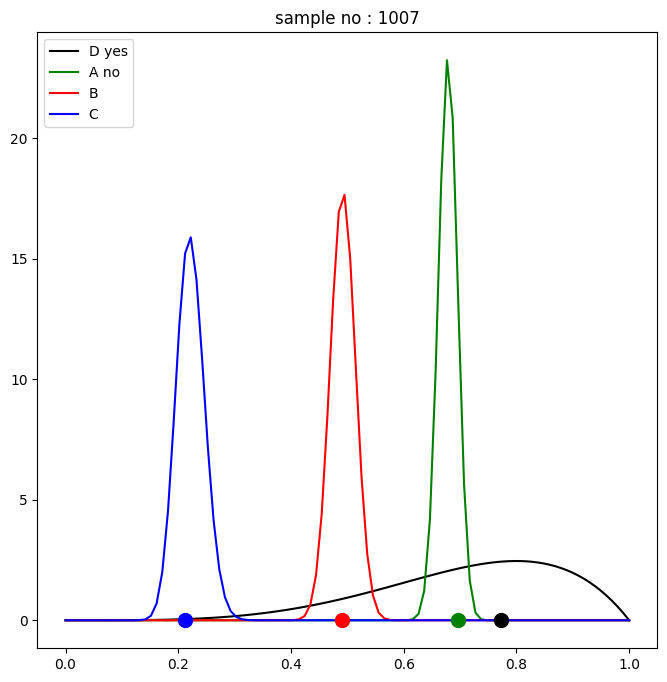

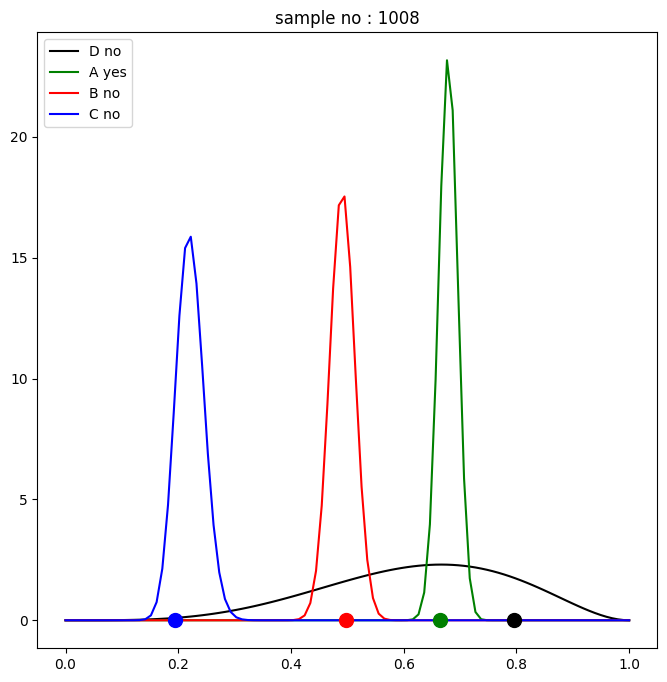

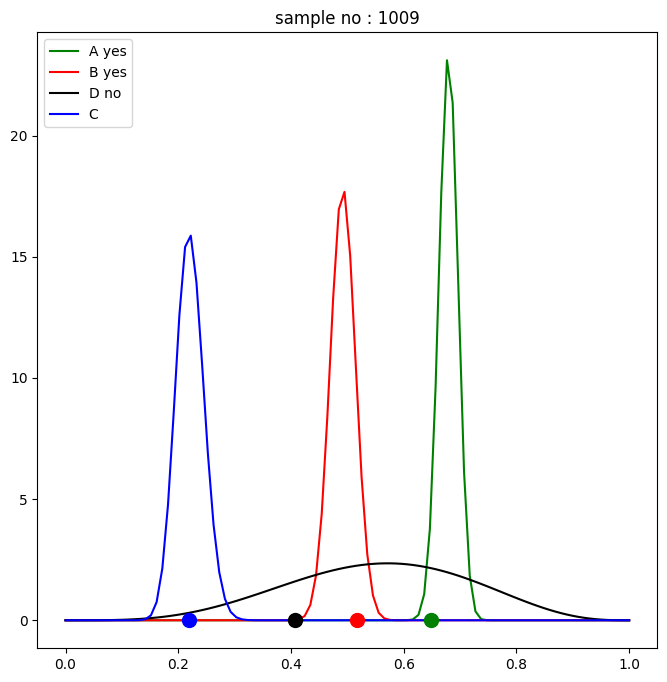

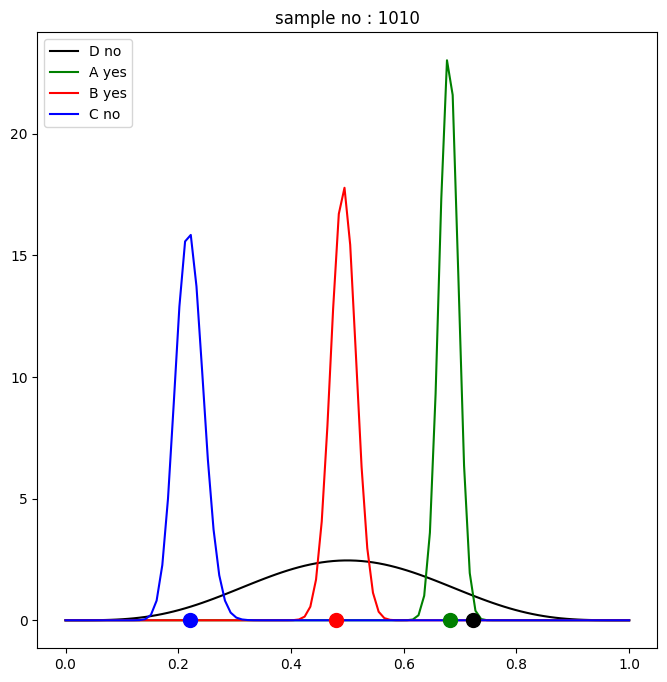

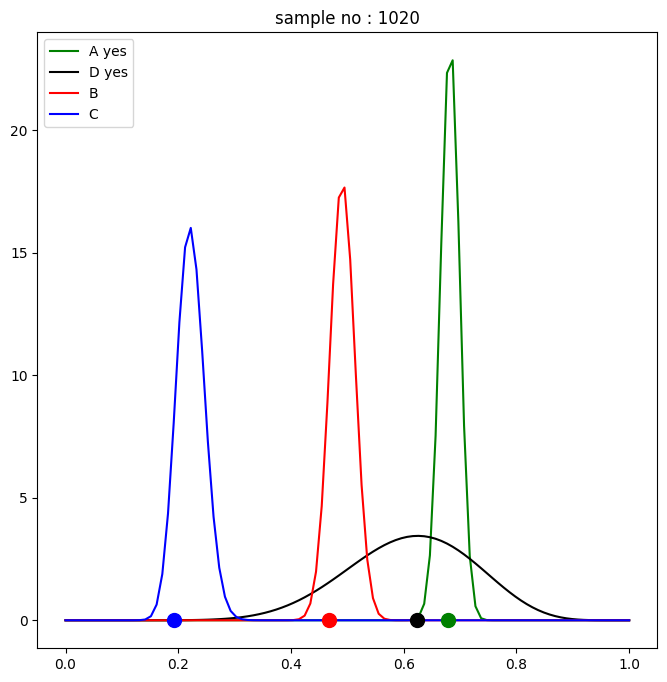

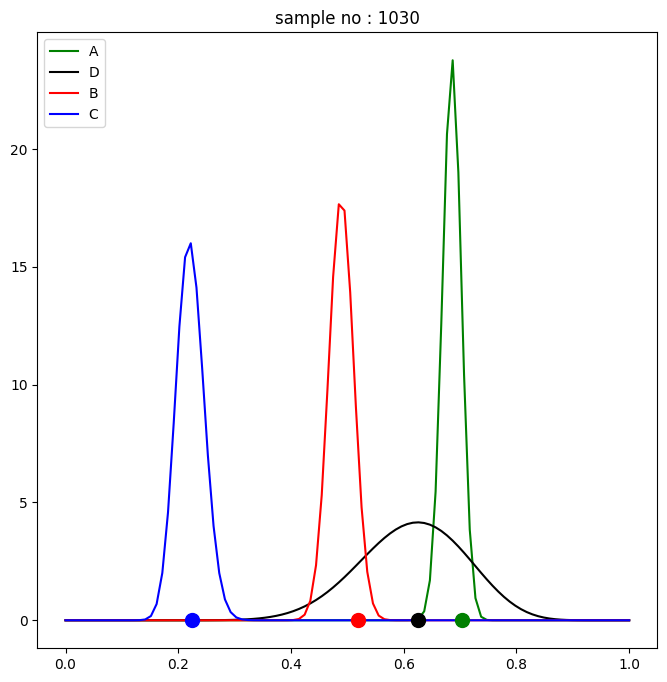

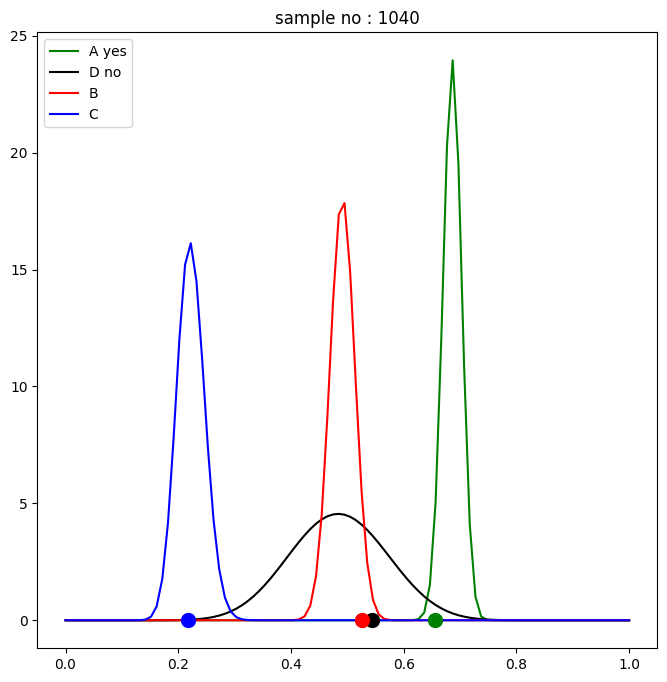

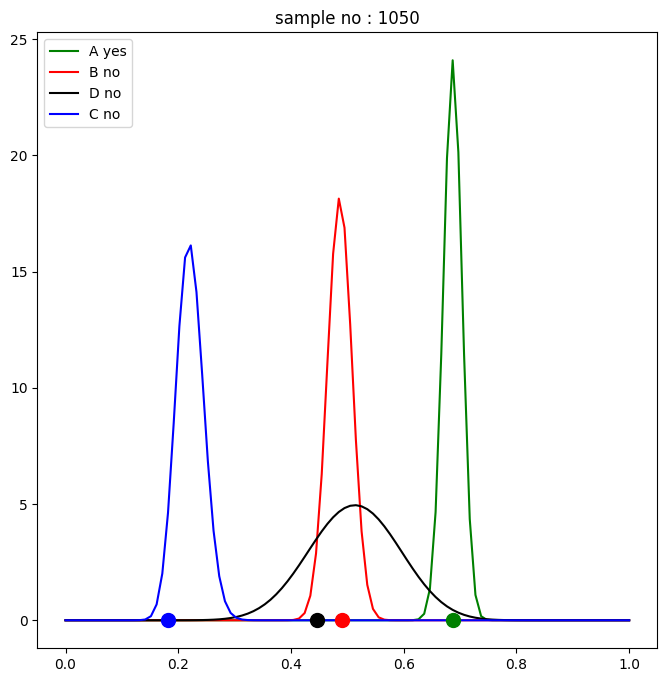

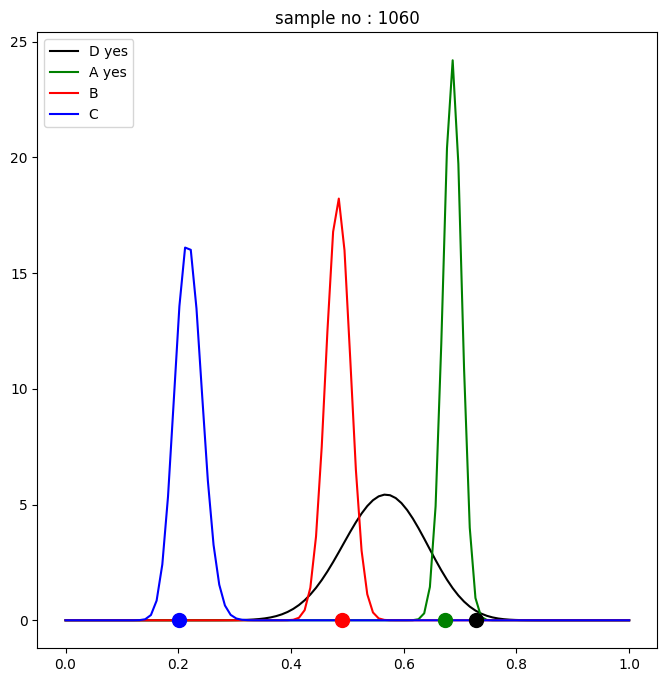

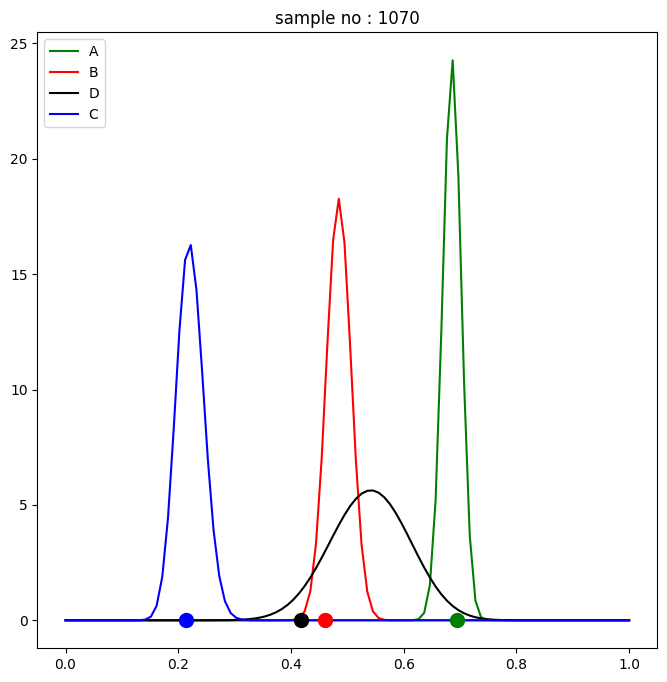

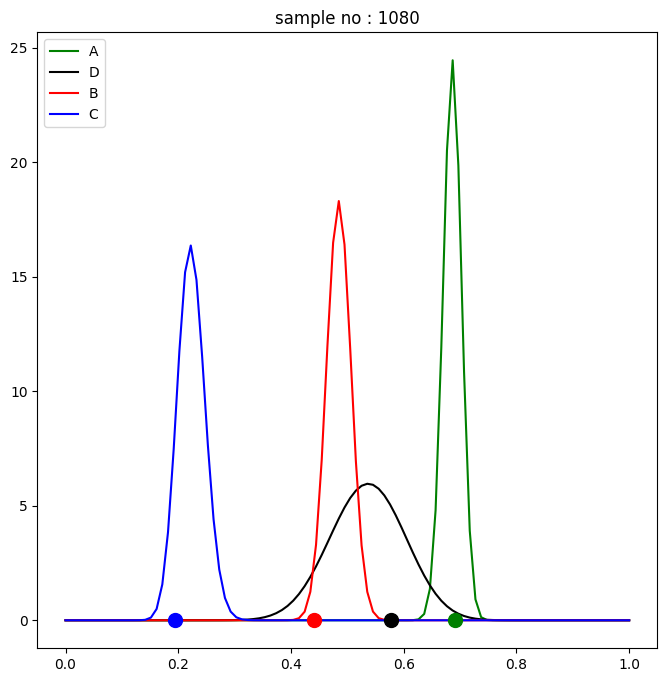

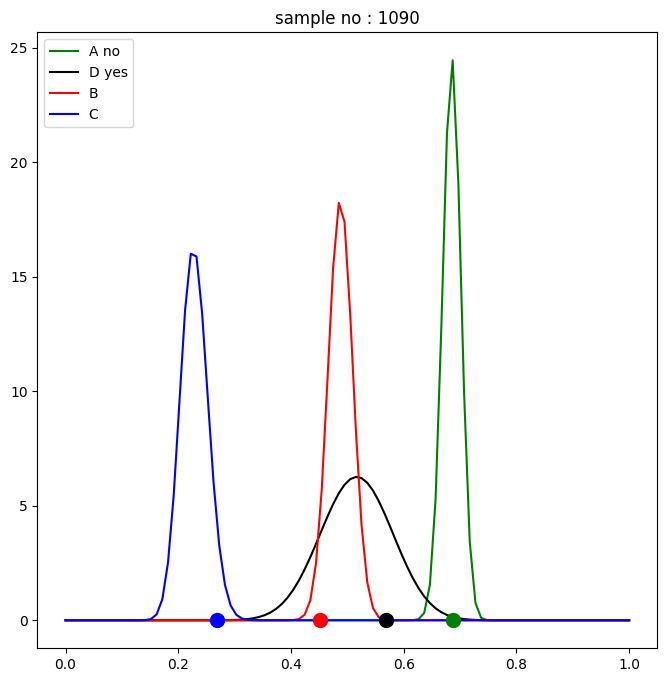

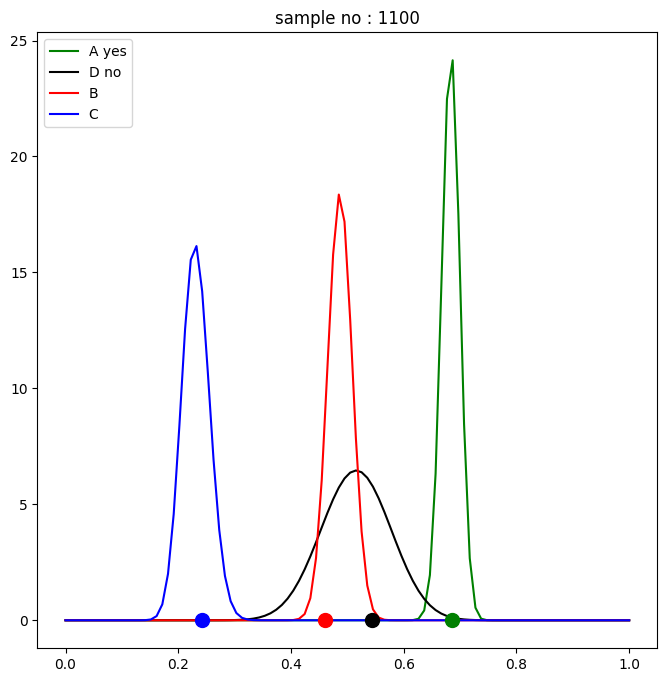

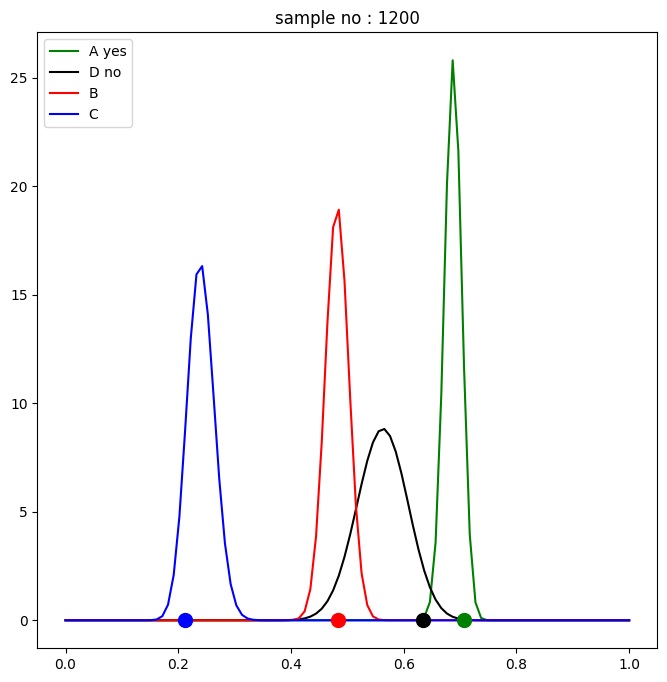

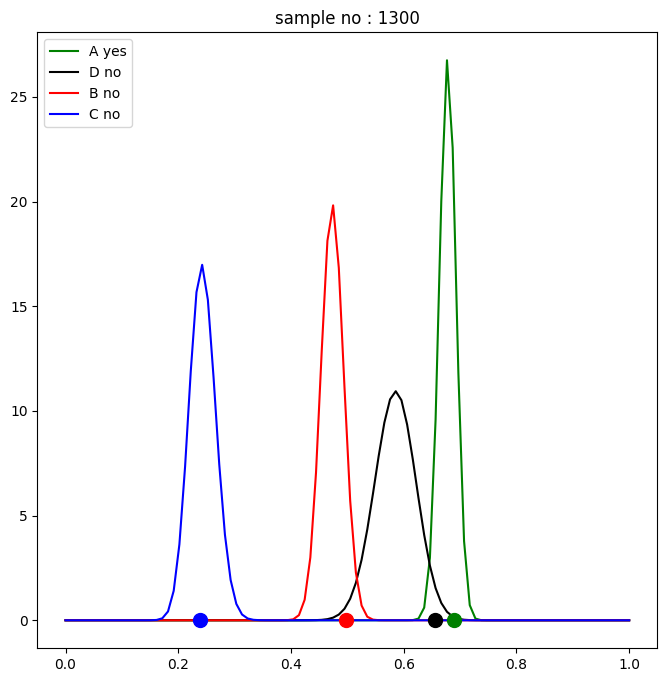

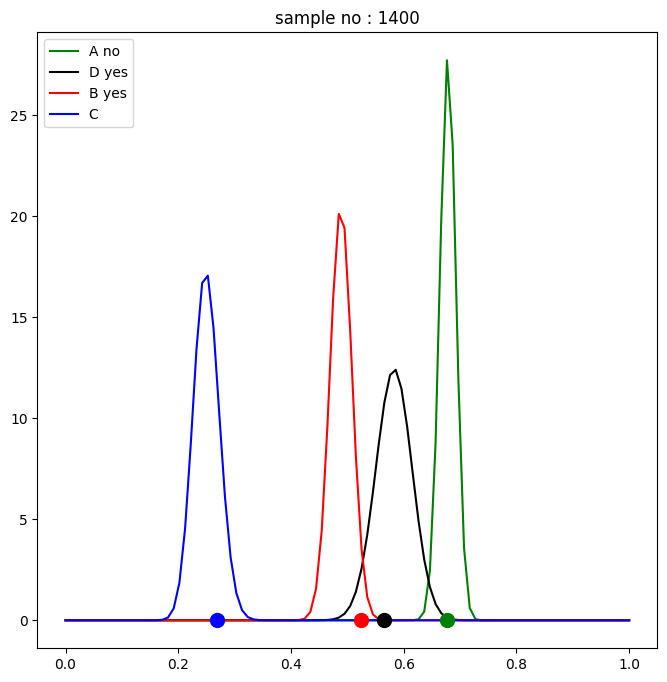

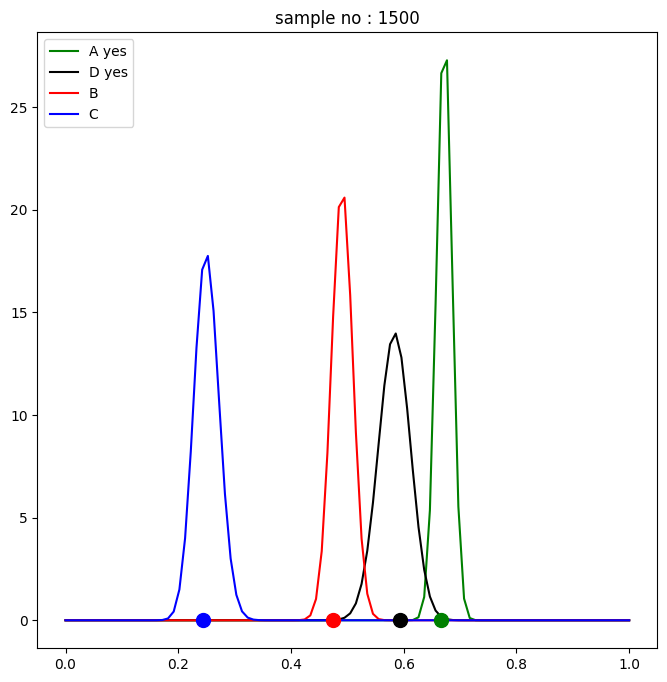

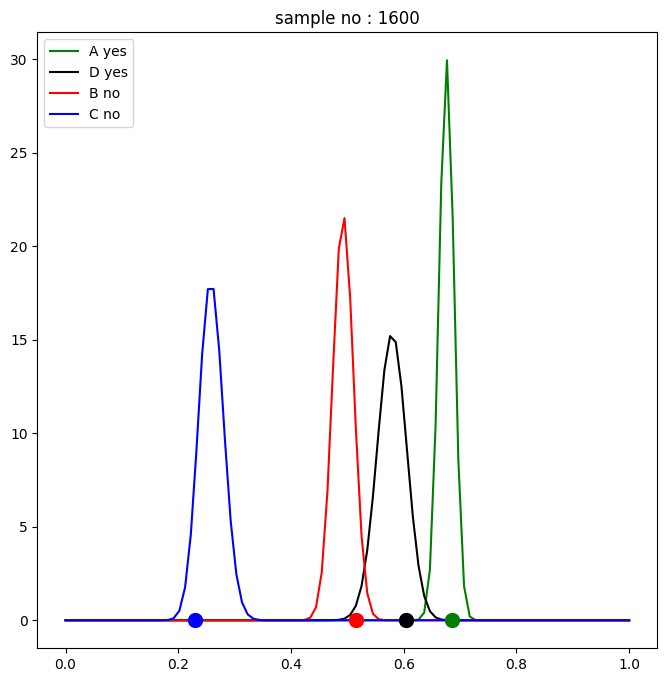

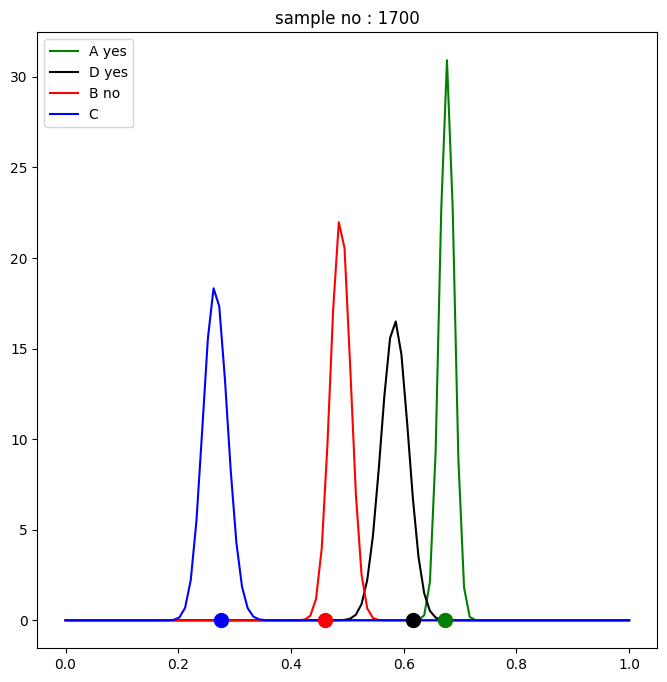

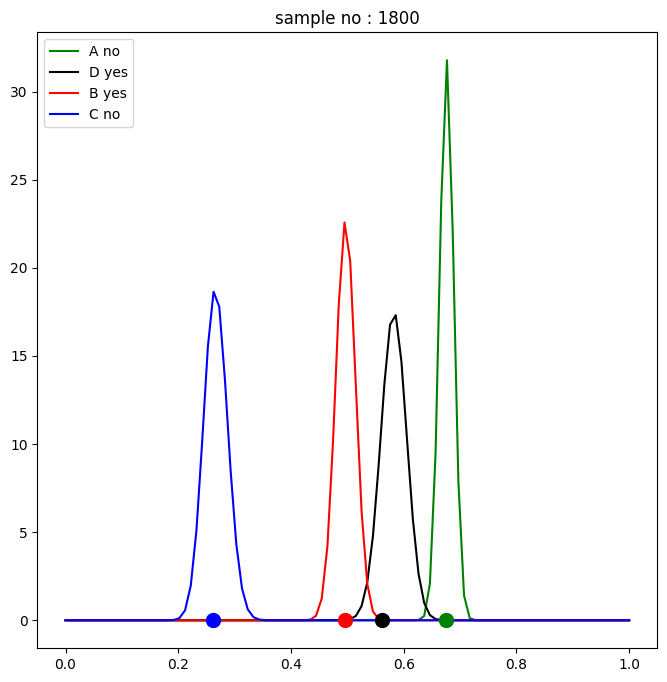

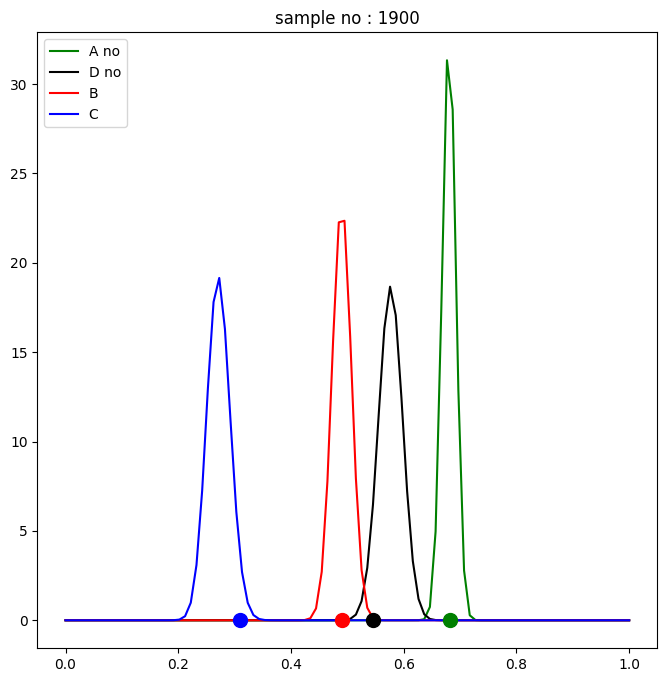

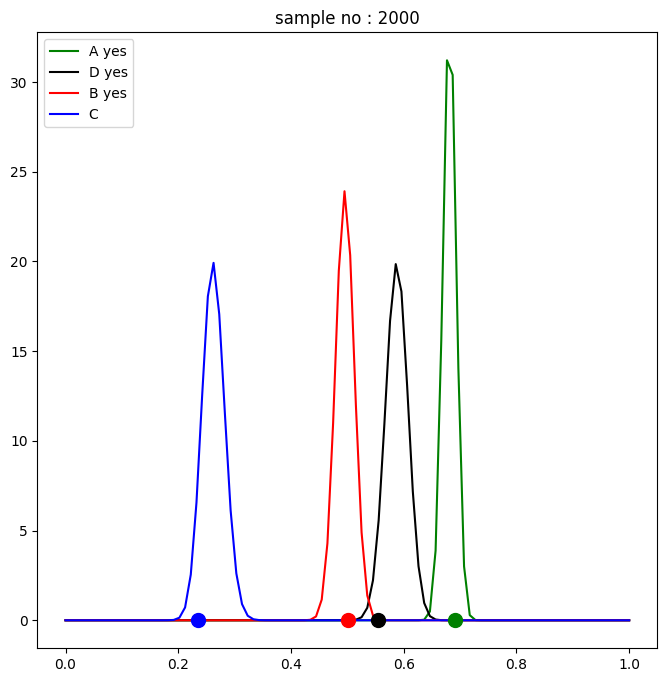

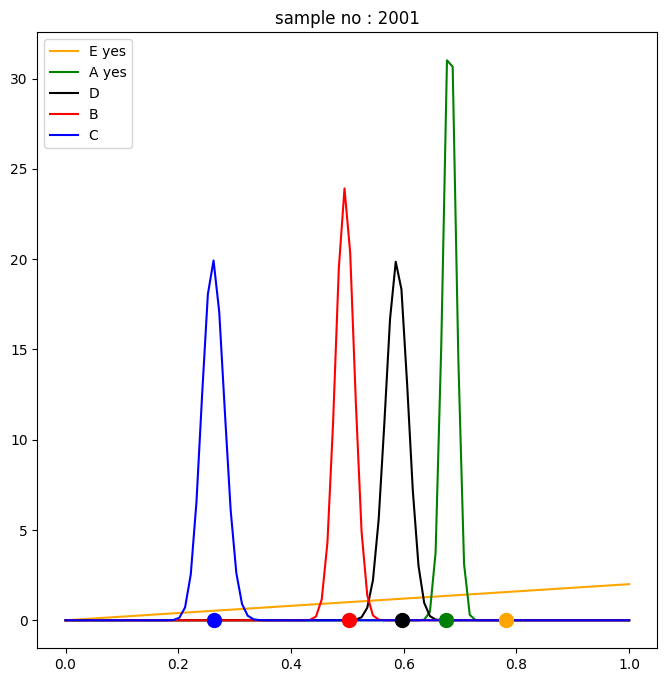

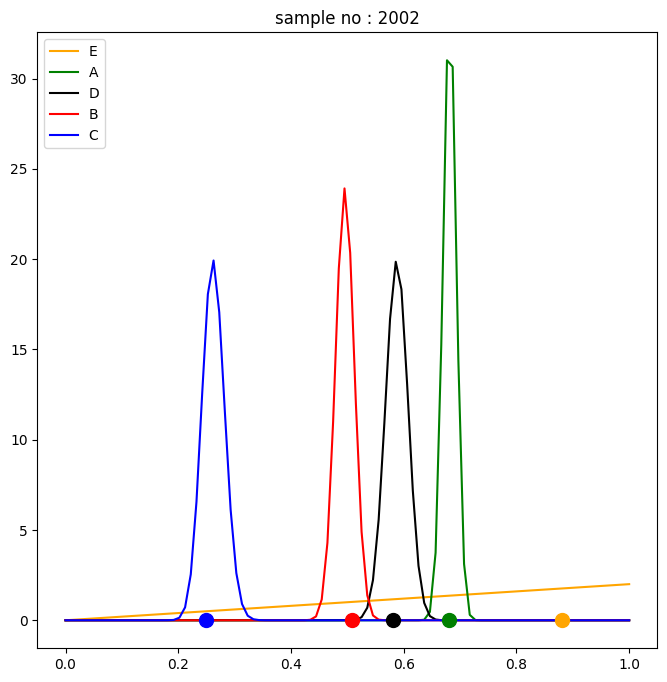

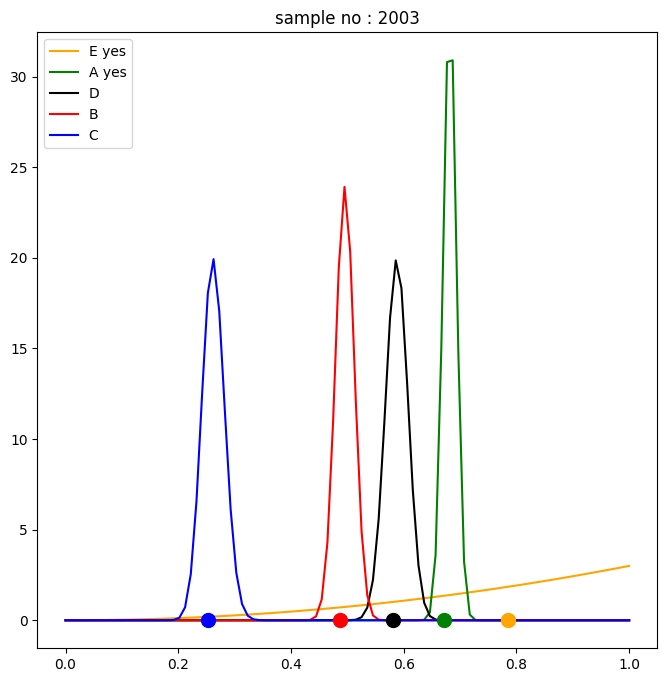

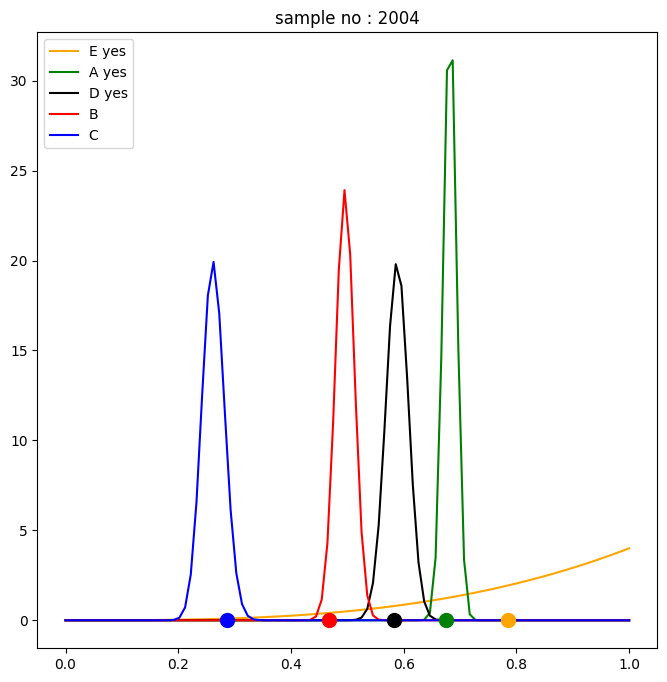

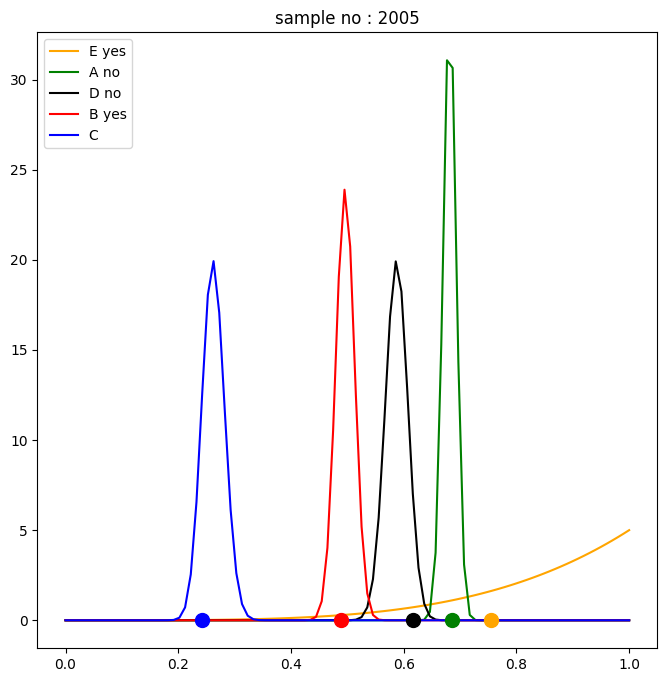

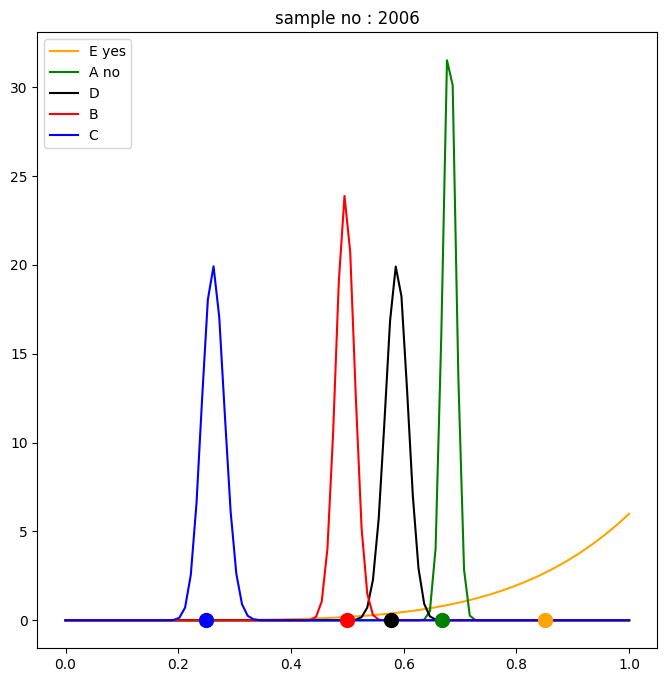

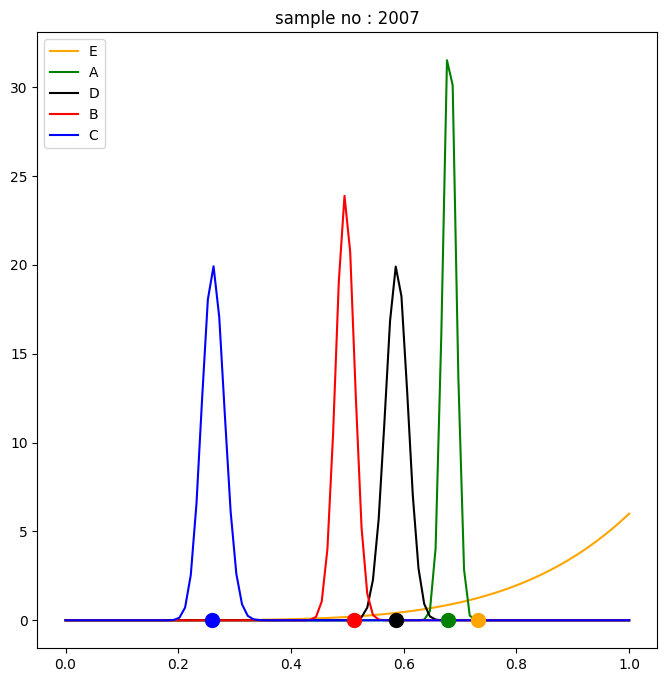

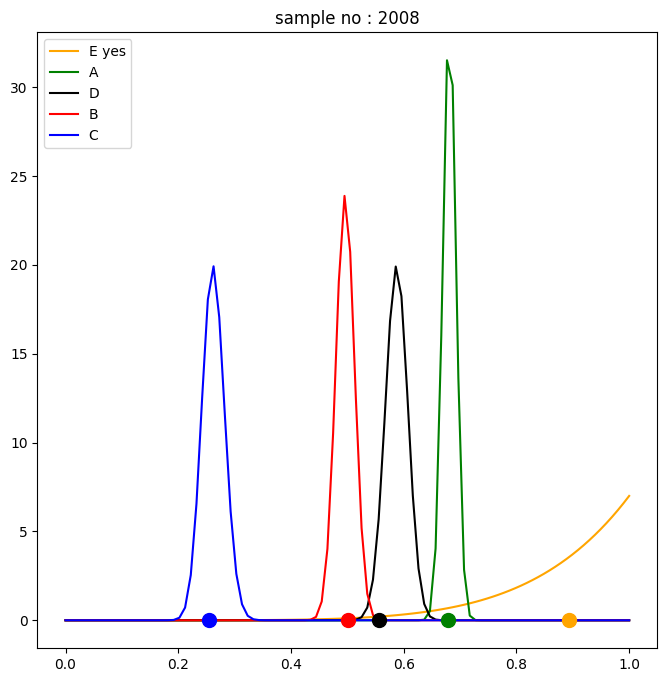

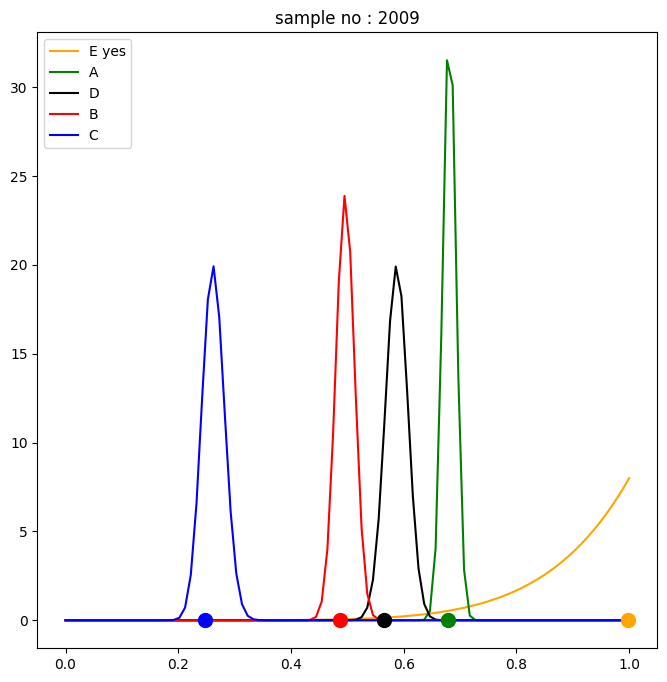

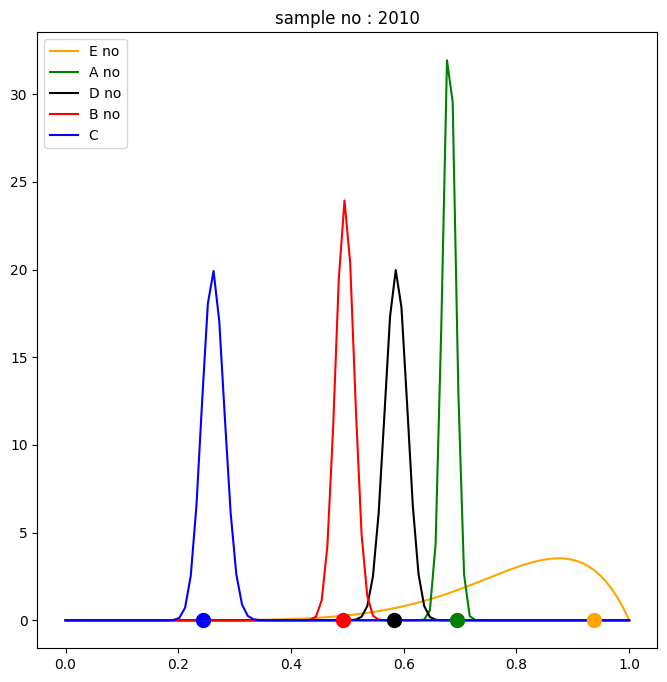

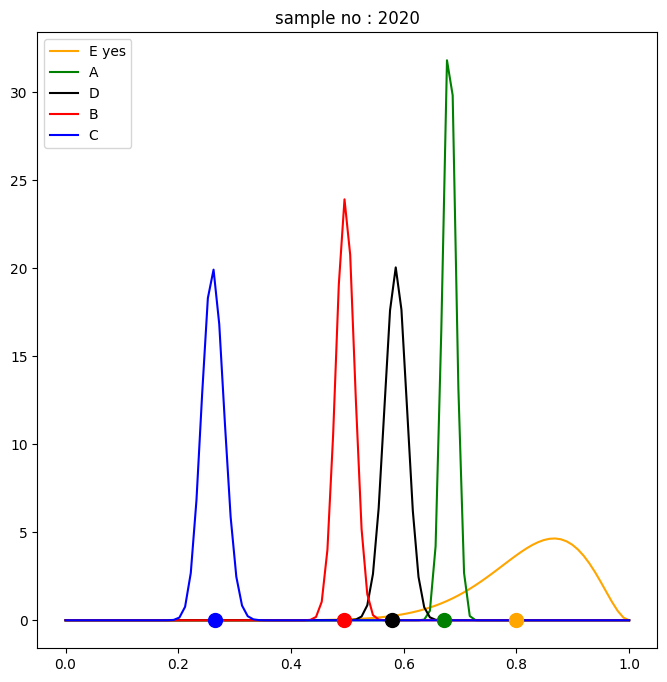

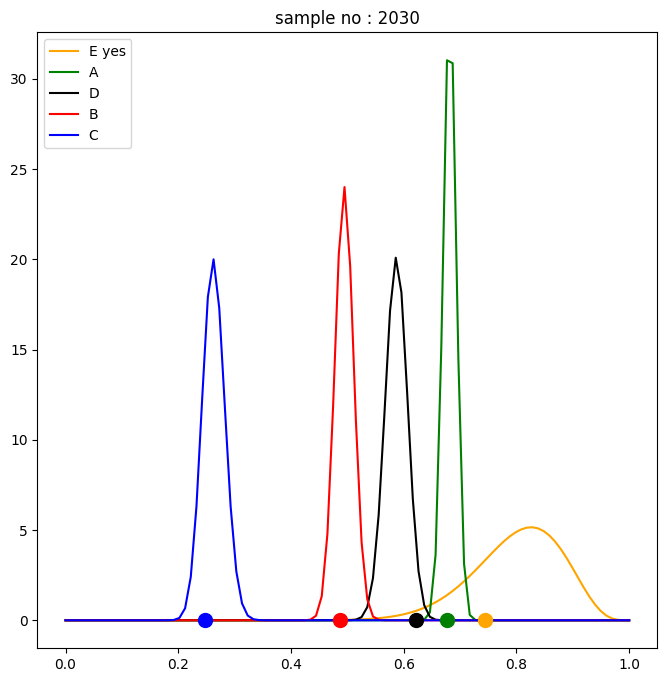

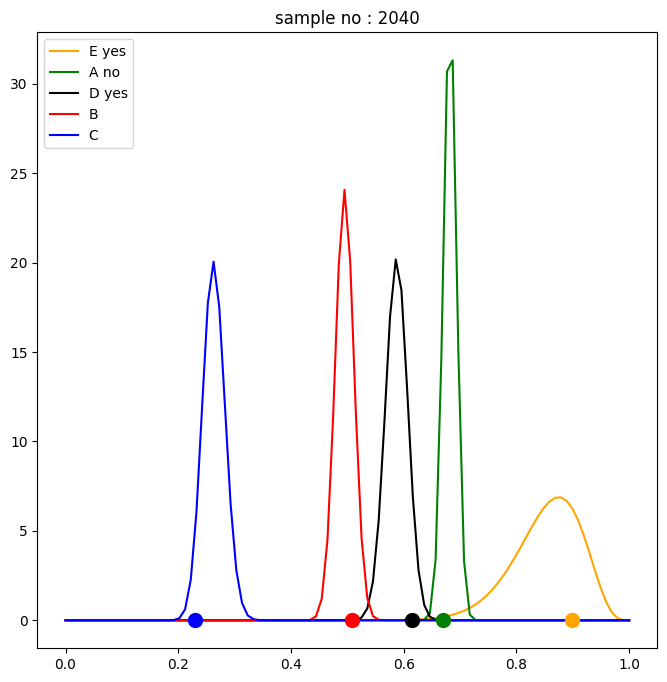

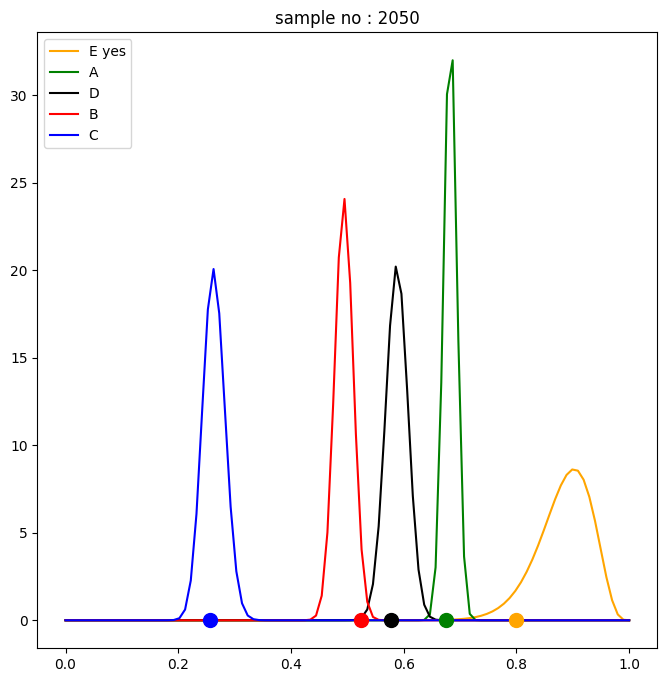

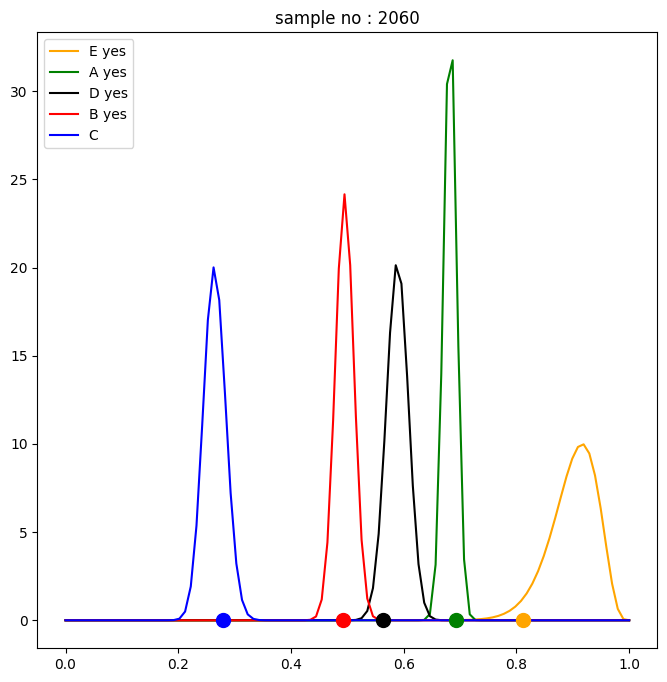

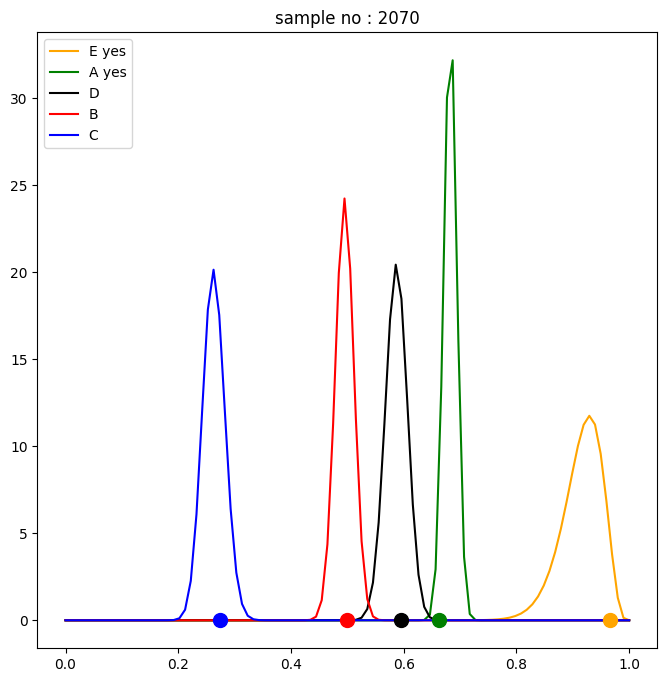

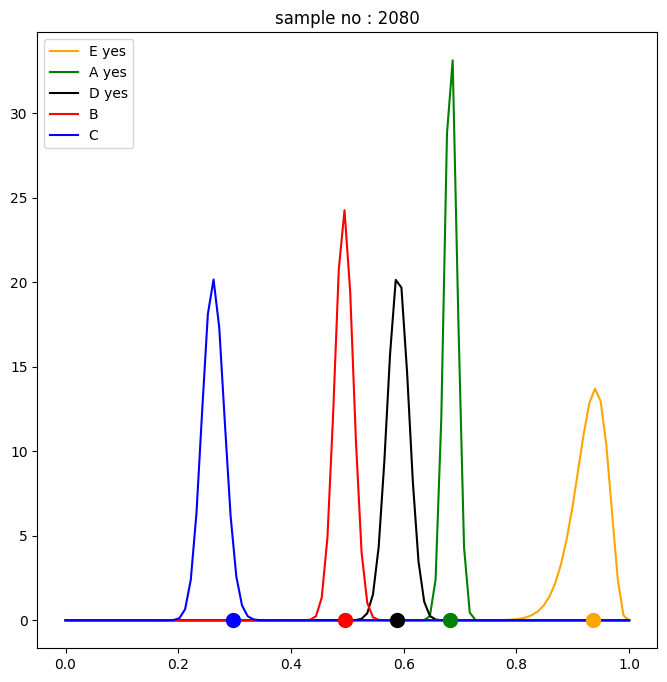

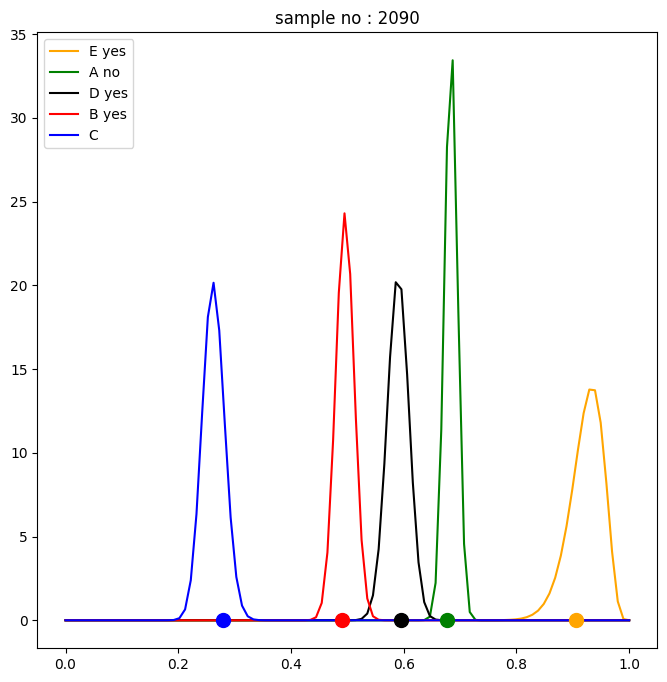

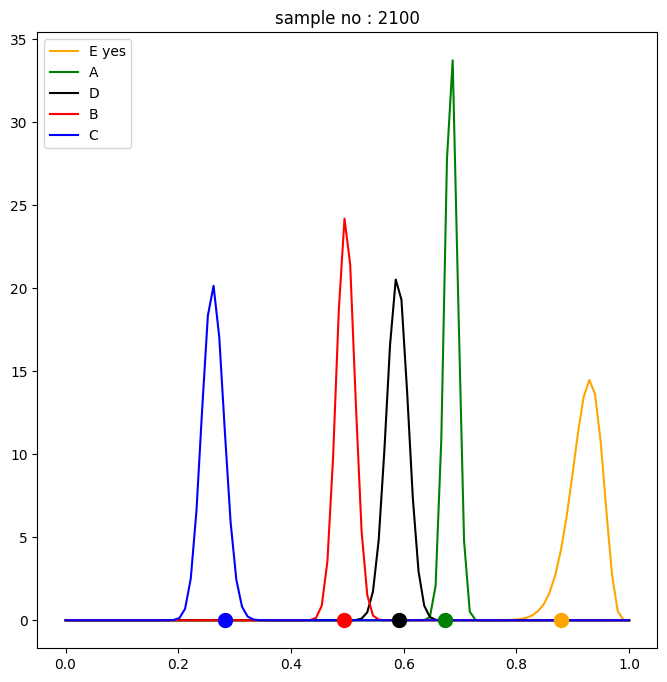

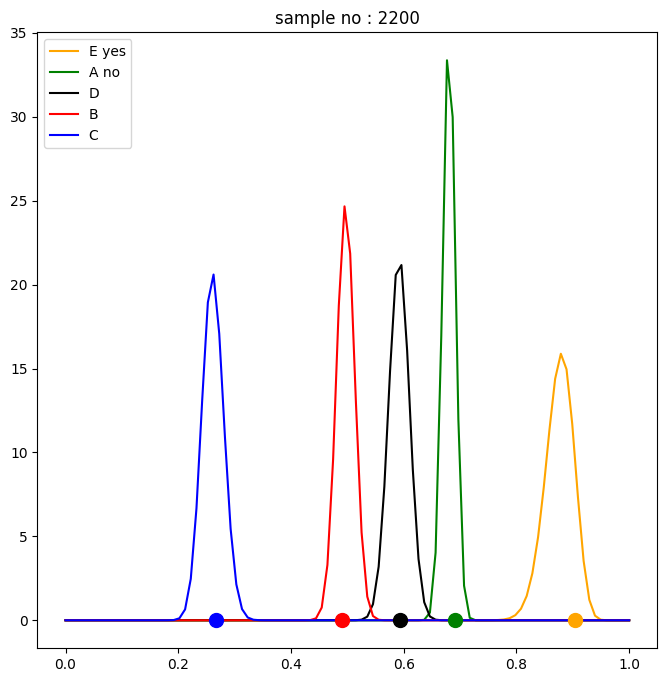

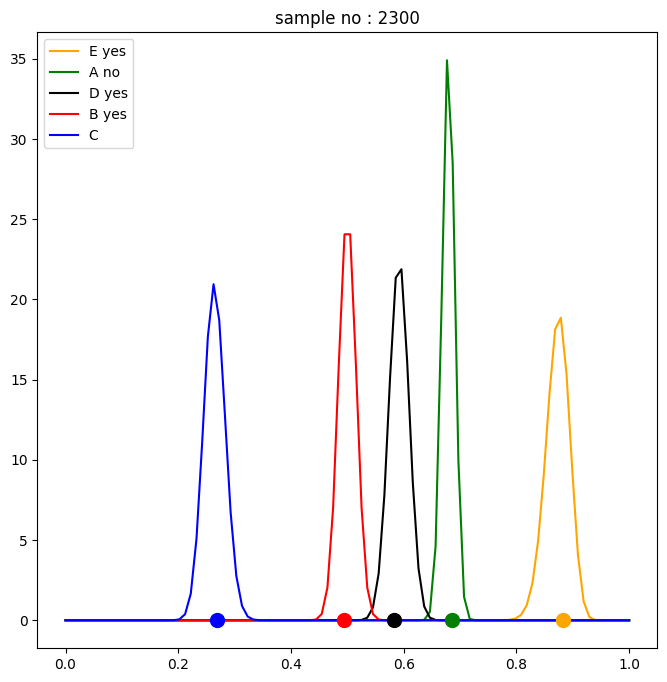

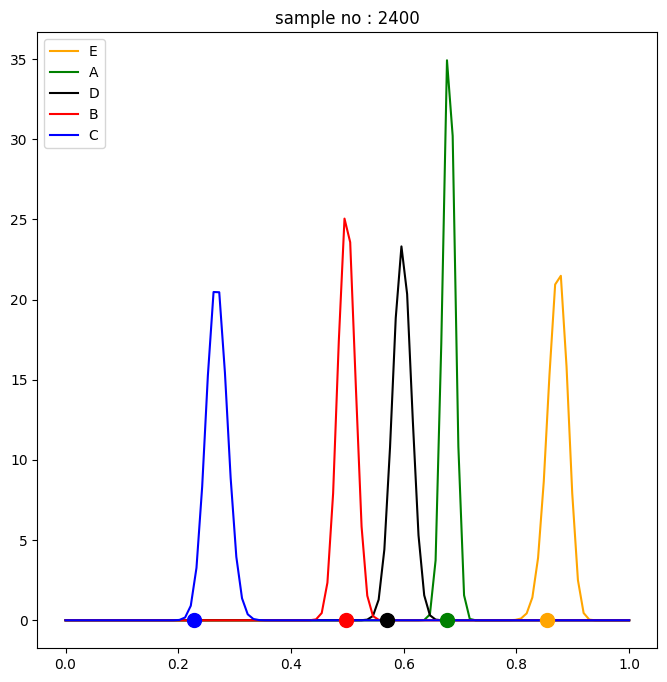

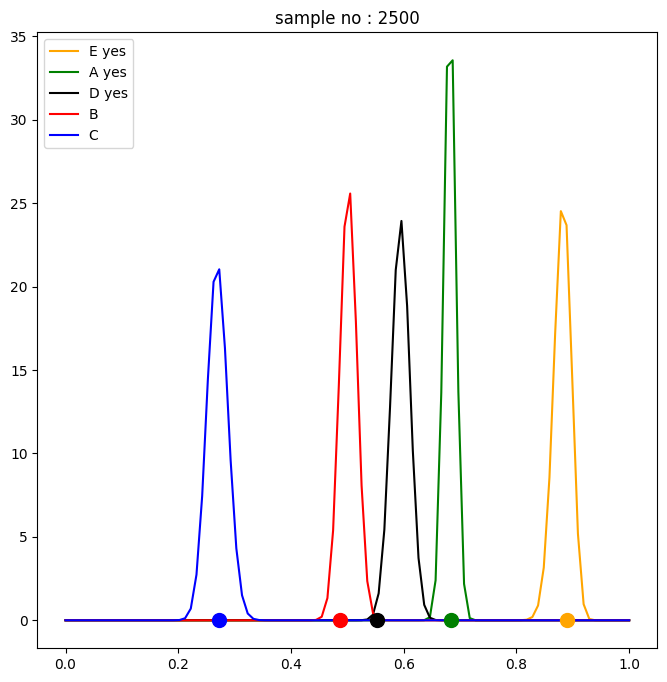

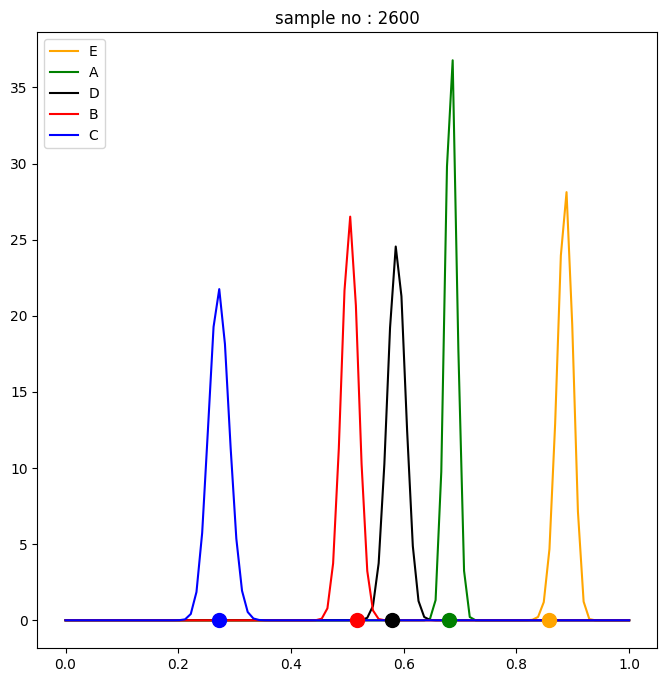

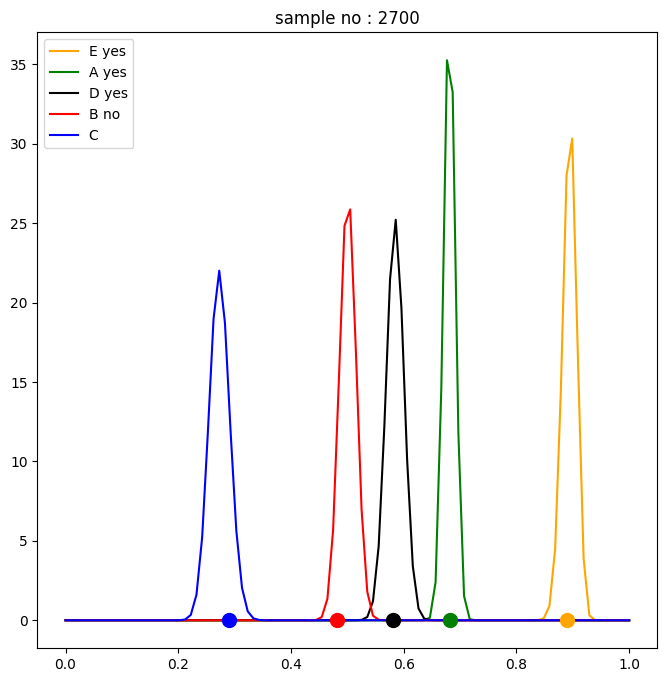

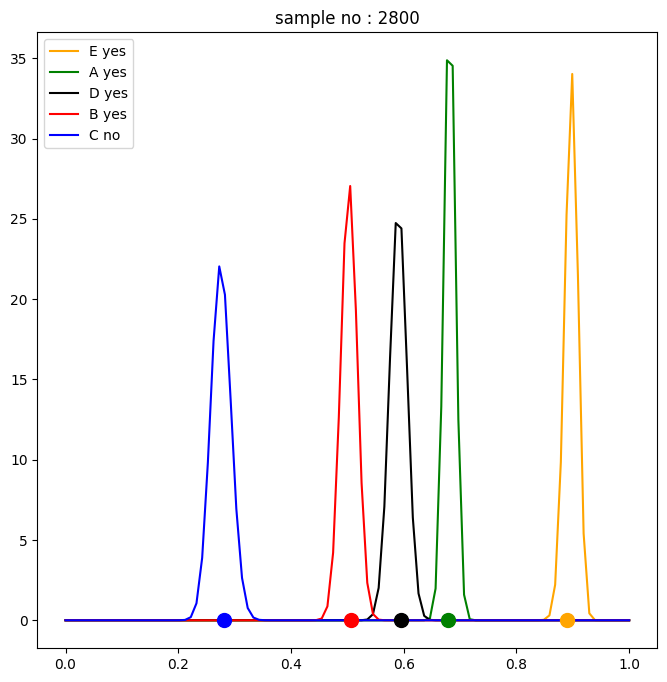

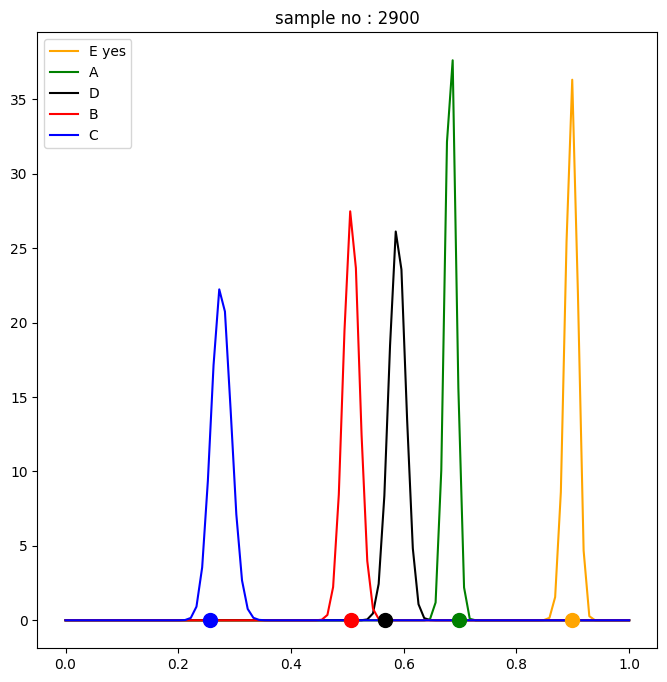

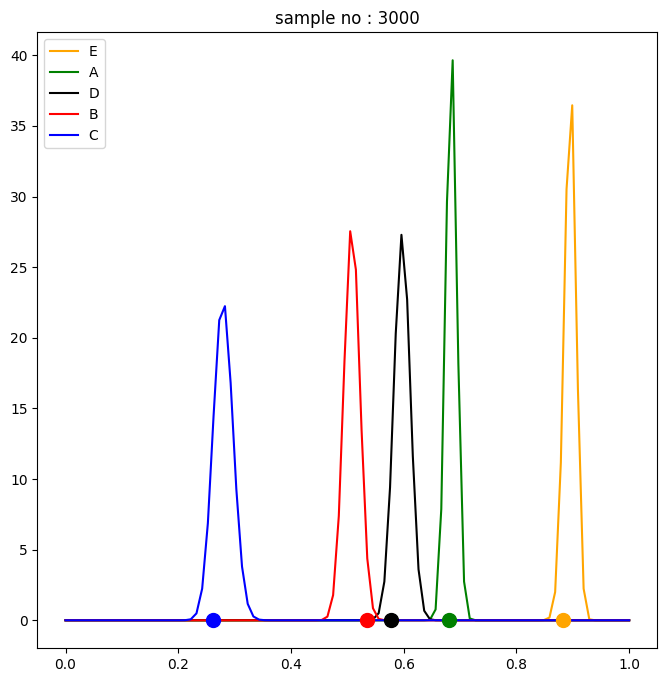

In [5]:
for num in range(3,6,1):
    rand_var = np.zeros(num)
    for t in range(1000):
        for i in range(num):
            rand_var[i] = np.random.beta(alpha[i], beta[i])
        cur_order = sorted(list(enumerate(rand_var)), key=lambda x : x[1], reverse=True)
        cur_order = [x[0] for x in cur_order]
        orderings.append([label_id[id] for id in cur_order])
        x = np.random.randint(0,num+1) #user watched first x videos out of num in range [0,num]
        watched = np.zeros(num)
        for id in cur_order[:x]:
            p = chances[id, np.random.randint(0,10)] # chances to watch video id completely
            alpha[id]+=p
            beta[id]+=(1-p)
            watched[id] = (p+1)
        if t in req_timestep:
            plt.figure(figsize=(8,8))
            for id in cur_order:
                if watched[id]==0:
                    plt.plot(x_axis, beta_dist.pdf(x_axis,alpha[id],beta[id]), label=label_id[id], color=colors_list[id])
                elif watched[id]==1:
                    plt.plot(x_axis, beta_dist.pdf(x_axis,alpha[id],beta[id]), label=neg_label_id[id], color=colors_list[id])
                else:
                    plt.plot(x_axis, beta_dist.pdf(x_axis,alpha[id],beta[id]), label=pos_label_id[id], color=colors_list[id])
            for id in cur_order:
                plt.plot(rand_var[id], 0, marker='o', markersize= 10, color=colors_list[id])
            plt.legend(loc='upper left')
            plt.title("sample no : "+str(t+1+1000*(num-3)))
            name = "plots/at_sample_"+str(t+1+1000*(num-3))+".jpg"
            filenames.append(name)
            plt.savefig(name)
            plt.show()

In [6]:
import cv2
filenames.append(filenames[0])
frame = cv2.imread(filenames[0])
height, width, layers = frame.shape
video_name = 'complete_simulation.avi'
video = cv2.VideoWriter(video_name, 0, 0.5, (width,height))
for image in filenames:
    video.write(cv2.imread(image))
video.release()

In [7]:
df = pd.DataFrame(orderings)
df.to_csv('sample_ranking.csv', index=False)

In [5]:
req_timestep = list(np.concatenate((np.arange(0,10), np.arange(19,100,10), np.arange(199,1000,100))))
all_filenames = []
for num in range(3,6):
    for t in req_timestep:
        all_filenames.append("plots/at_sample_"+str(t+1+1000*(num-3))+".jpg")
all_filenames.append(all_filenames[0])

In [6]:
def create_video(images_name_list, video_name): #last file name in images_name_list will be skipped
    frame = cv2.imread(images_name_list[0])
    height, width, layers = frame.shape
    video = cv2.VideoWriter(video_name, 0, 0.5, (width,height))
    for image in images_name_list:
        video.write(cv2.imread(image))
    video.release()

In [11]:
create_video(all_filenames[0:29], "at_start.avi")
create_video(all_filenames[28:57], "d_introduced.avi")
create_video(all_filenames[56:], "e_introduced.avi")